# Udacity Advance Lane Finding Project - Term 1

In this project we are supposed to the following on a provided video:
    1. Camera Calibration
    2. Distortion Correction
    3. Generate Binary Image using Color Transform to HLS, Gradient Threshold etc
    4. Apply Perspective Transform
    5. Find Lane Lines and Fit a second degree polynomial and verify the lanes are correctly identified. 
    6. Project the identified lane lines on the original road image and measure the radius of curvature. 
    
    Project Rubrics are explained below alongwith code:
   

In [1]:
#IMPORTS
import numpy as np
import pickle
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

print ('Check')

Check


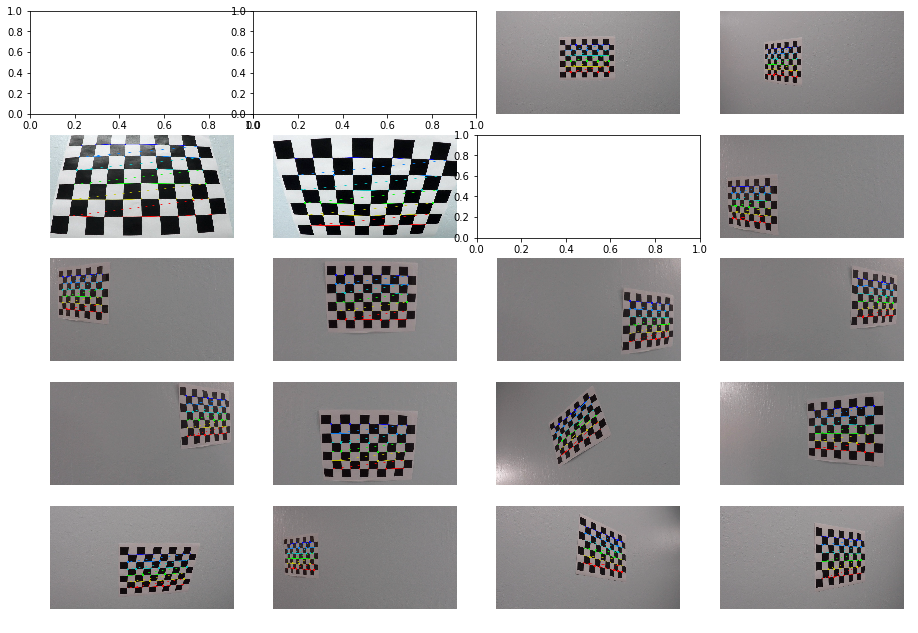

In [2]:
#CAMERA CALIBRATION

# prepare object points, like (0,00,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

#plots
fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

# Step through the list and search for chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    #imshow(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    #print (i)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[i].axis('off')
        axs[i].imshow(img)

some of these images do not appear because the specified number of chessboard corners were not found


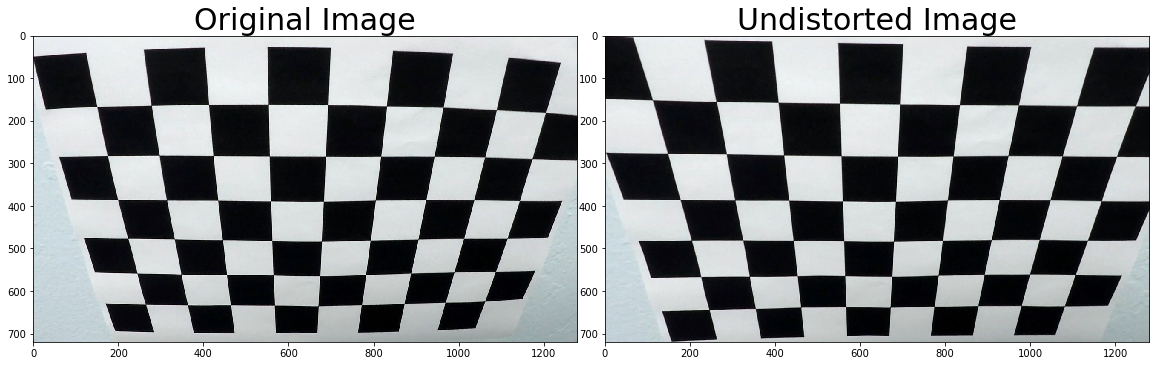

In [3]:
# Test undistortion on an image
img = cv2.imread('./camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration.p", "wb" ) )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# Example Image to Test Pipeline

...


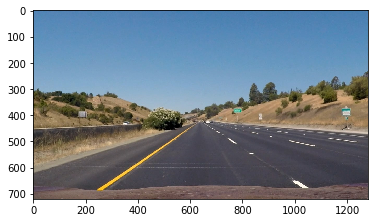

In [36]:
# Choose an image from which to build and demonstrate each step of the pipeline
exampleImg = cv2.imread('./test_images/straight_lines1.jpg')
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
plt.imshow(exampleImg)
print('...')

In [37]:
# undistort image using camera calibration matrix from above
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
print('#')


#


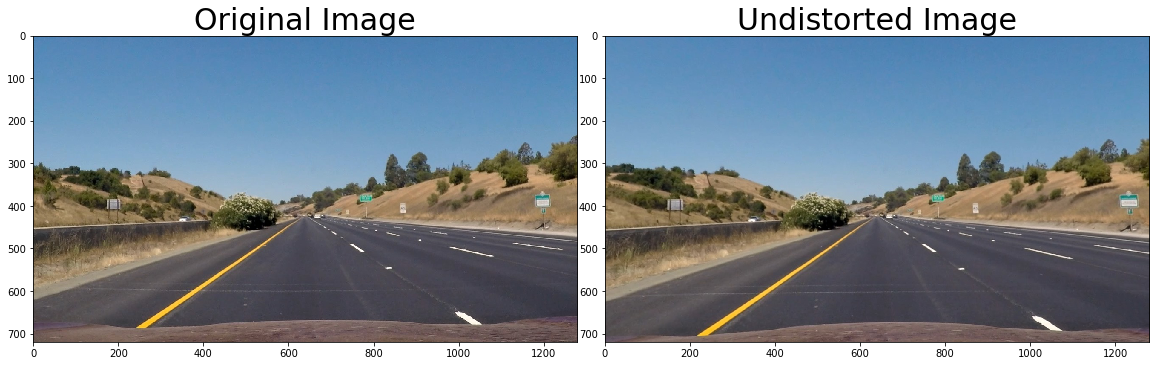

In [38]:
exampleImg_undistort = undistort(exampleImg)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(exampleImg_undistort)
ax2.set_title('Undistorted Image', fontsize=30)

In [56]:
def unwarp(img,src,dst):
    h,w = img.shape[:2]
    #get perspective transform and inverse
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return warped, M, Minv
print ('#')

#


...


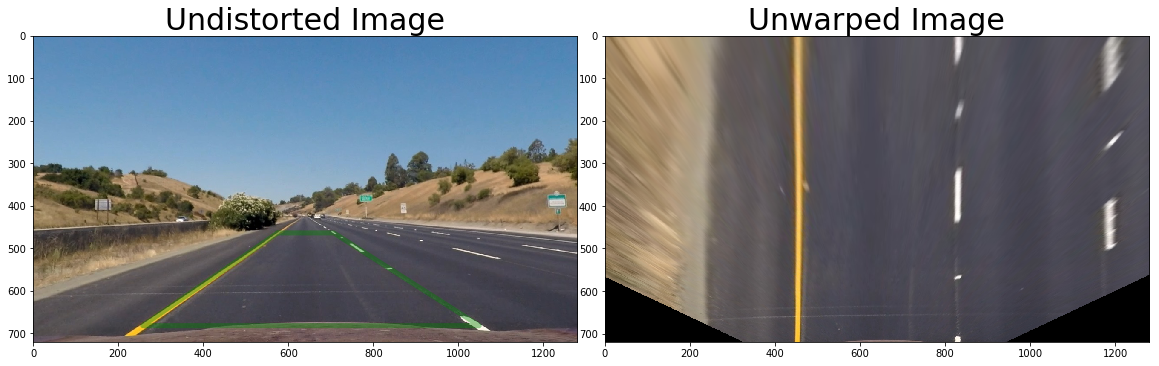

In [40]:
h,w = exampleImg_undistort.shape[:2]

# define source and destination points for transform
src = np.float32([(575,464),
                  (707,464), 
                  (258,682), 
                  (1049,682)])
dst = np.float32([(450,0),
                  (w-450,0),
                  (450,h),
                  (w-450,h)])

exampleImg_unwarp, M, Minv = unwarp(exampleImg_undistort, src, dst)

# Visualize unwarp
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_undistort)
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
ax1.plot(x, y, color='green', alpha=0.4, linewidth=5, solid_capstyle='round', zorder=2)
ax1.set_ylim([h,0])
ax1.set_xlim([0,w])
ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(exampleImg_unwarp)
ax2.set_title('Unwarped Image', fontsize=30)

print('...')

# Visualise Multiple Color Channels of Unwarped Image

#


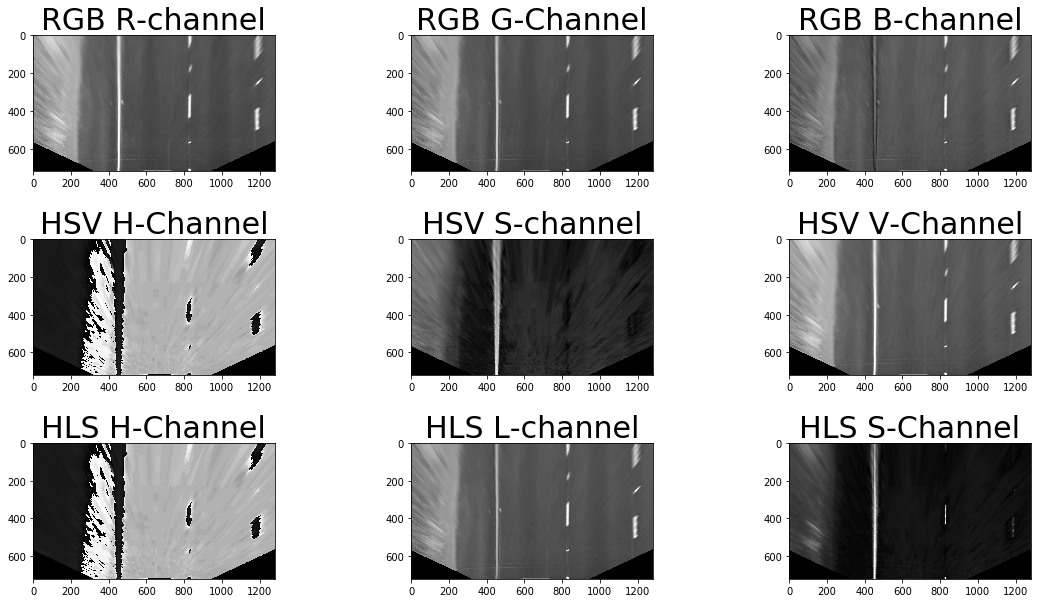

In [41]:
# Visualize multiple color space channels
exampleImg_unwarp_R = exampleImg_unwarp[:,:,0]
exampleImg_unwarp_G = exampleImg_unwarp[:,:,1]
exampleImg_unwarp_B = exampleImg_unwarp[:,:,2]

exampleImg_unwarp_HSV = cv2.cvtColor(exampleImg_unwarp, cv2.COLOR_RGB2HSV)
exampleImg_unwarp_H = exampleImg_unwarp_HSV[:,:,0]
exampleImg_unwarp_S = exampleImg_unwarp_HSV[:,:,1]
exampleImg_unwarp_V = exampleImg_unwarp_HSV[:,:,2]

exampleImg_unwarp_HLS = cv2.cvtColor(exampleImg_unwarp, cv2.COLOR_RGB2HLS)
exampleImg_unwarp_H1 = exampleImg_unwarp_HLS[:,:,0]
exampleImg_unwarp_L = exampleImg_unwarp_HLS[:,:,1]
exampleImg_unwarp_S1 = exampleImg_unwarp_HLS[:,:,2]

fig, axs = plt.subplots(3,3, figsize=(20, 10))
fig.subplots_adjust(hspace = .5, wspace=.05)
axs = axs.ravel()
axs[0].imshow(exampleImg_unwarp_R, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=30)
axs[1].imshow(exampleImg_unwarp_G, cmap='gray')
axs[1].set_title('RGB G-Channel', fontsize=30)
axs[2].imshow(exampleImg_unwarp_B, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=30)
axs[3].imshow(exampleImg_unwarp_H, cmap='gray')
axs[3].set_title('HSV H-Channel', fontsize=30)
axs[4].imshow(exampleImg_unwarp_S, cmap='gray')
axs[4].set_title('HSV S-channel', fontsize=30)
axs[5].imshow(exampleImg_unwarp_V, cmap='gray')
axs[5].set_title('HSV V-Channel', fontsize=30)
axs[6].imshow(exampleImg_unwarp_H1, cmap='gray')
axs[6].set_title('HLS H-Channel', fontsize=30)
axs[7].imshow(exampleImg_unwarp_L, cmap='gray')
axs[7].set_title('HLS L-channel', fontsize=30)
axs[8].imshow(exampleImg_unwarp_S1, cmap='gray')
axs[8].set_title('HLS S-Channel', fontsize=30)



print('#')

# Apply Sobel Gradient and Direction Thresholds

In [42]:

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
def abs_sobel_thresh(img, orient='x', thresh_min=25, thresh_max=255):
    # Apply the following steps to img
    # 1) Convert to grayscale === or HLS S channel to pick up yellow lines
    gray = (cv2.cvtColor(img, cv2.COLOR_RGB2HLS))[:,:,2]
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobel = cv2.Sobel(gray, cv2.CV_64F, orient=='x', orient=='y')
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = sxbinary # Remove this line
    return binary_output
print('#')

#


Visualise Sobel absolute threshold on example image

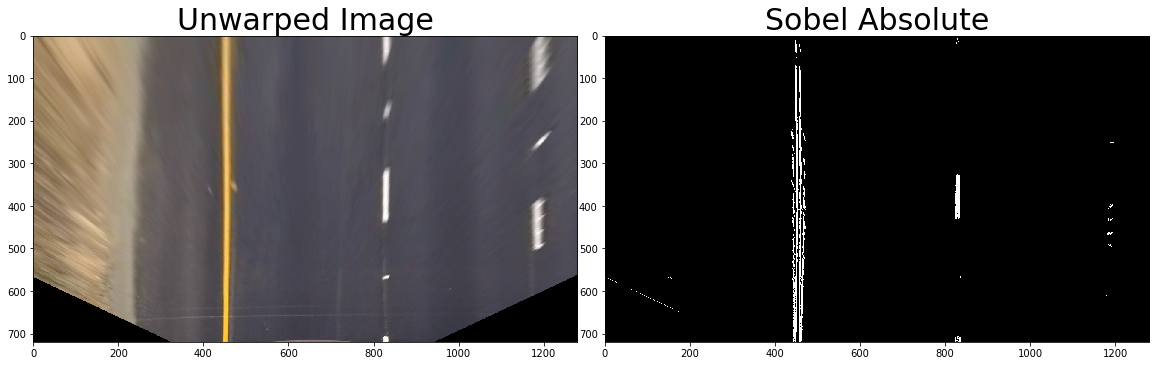

In [43]:
from ipywidgets import interact, interactive, fixed

def update(min_thresh, max_thresh):
    exampleImg_sobelAbs = abs_sobel_thresh(exampleImg_unwarp, 'x', min_thresh, max_thresh)
    # Visualize sobel absolute threshold
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(exampleImg_unwarp)
    ax1.set_title('Unwarped Image', fontsize=30)
    ax2.imshow(exampleImg_sobelAbs, cmap='gray')
    ax2.set_title('Sobel Absolute', fontsize=30)

interact(update, 
         min_thresh=(0,255),
         max_thresh=(0,255))
print('#')

# Sobel Magnitude Threshold

In [44]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=25, mag_thresh=(25, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Calculate the magnitude 
    mag_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*mag_sobel/np.max(mag_sobel))
    # 5) Create a binary mask where mag thresholds are met
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(sxbinary) 
    return binary_output
print('#')

#


Visualize Sobel magnitude threshold on example image

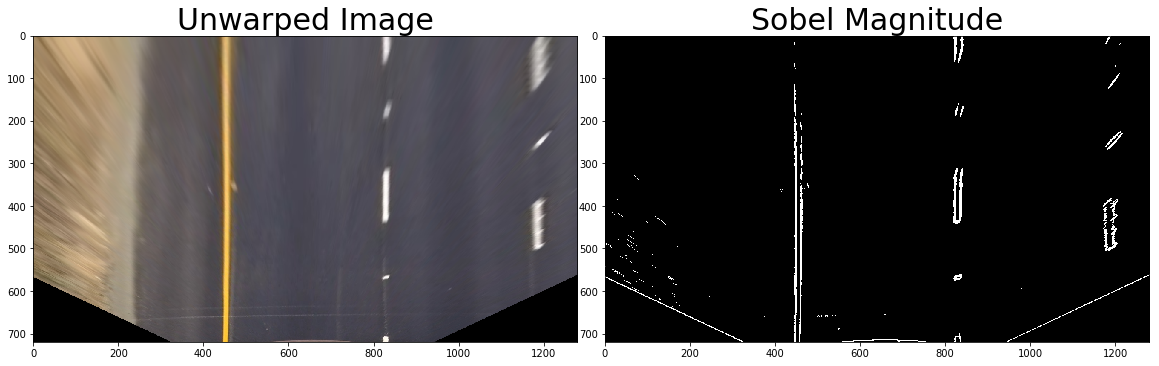

In [45]:

def update(kernel_size, min_thresh, max_thresh):
    exampleImg_sobelMag = mag_thresh(exampleImg_unwarp, kernel_size, (min_thresh, max_thresh))
    # Visualize sobel magnitude threshold
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(exampleImg_unwarp)
    ax1.set_title('Unwarped Image', fontsize=30)
    ax2.imshow(exampleImg_sobelMag, cmap='gray')
    ax2.set_title('Sobel Magnitude', fontsize=30)

interact(update, kernel_size=(1,31,2), 
                 min_thresh=(0,255), 
                 max_thresh=(0,255))

print('#')

# Sobel Direction Threshold

In [46]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_thresh(img, sobel_kernel=3, thresh=(0, np.pi/2)):    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output =  np.zeros_like(grad_dir)
    binary_output[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output
print('#')

#


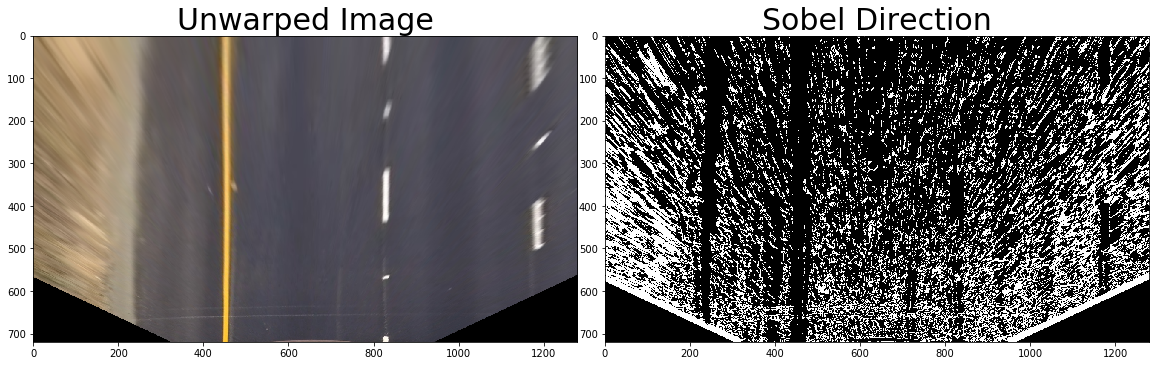

In [47]:
#Visualize Sobel direction threshold on example image

def update(kernel_size, min_thresh, max_thresh):
    exampleImg_sobelDir = dir_thresh(exampleImg_unwarp, kernel_size, (min_thresh, max_thresh))
    # Visualize sobel direction threshold
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(exampleImg_unwarp)
    ax1.set_title('Unwarped Image', fontsize=30)
    ax2.imshow(exampleImg_sobelDir, cmap='gray')
    ax2.set_title('Sobel Direction', fontsize=30)

interact(update, kernel_size=(1,31,2), 
                 min_thresh=(0,np.pi/2,0.01), 
                 max_thresh=(0,np.pi/2,0.01))

print('#')

# Sobel Magnitude + Direction Threshold¶


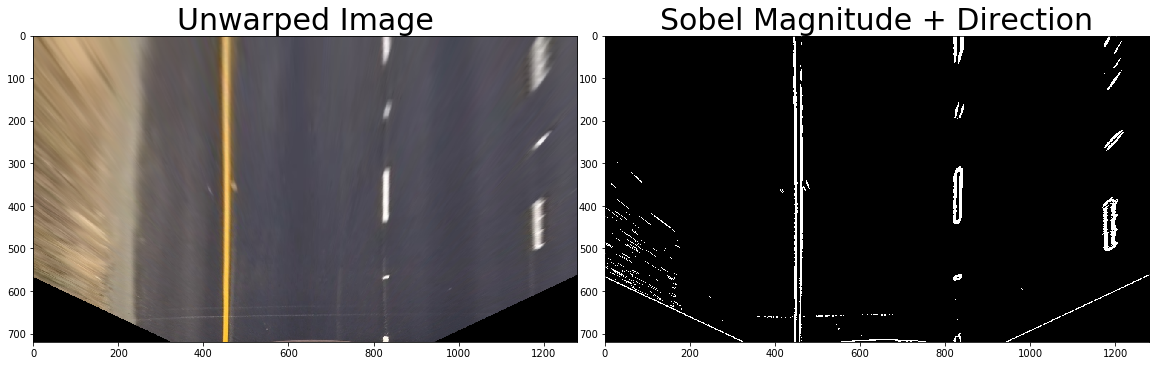

In [48]:

def update(mag_kernel_size, mag_min_thresh, mag_max_thresh, dir_kernel_size, dir_min_thresh, dir_max_thresh):
    exampleImg_sobelMag2 = mag_thresh(exampleImg_unwarp, mag_kernel_size, (mag_min_thresh, mag_max_thresh))
    exampleImg_sobelDir2 = dir_thresh(exampleImg_unwarp, dir_kernel_size, (dir_min_thresh, dir_max_thresh))
    combined = np.zeros_like(exampleImg_sobelMag2)
    combined[((exampleImg_sobelMag2 == 1) & (exampleImg_sobelDir2 == 1))] = 1
    # Visualize sobel magnitude + direction threshold
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(exampleImg_unwarp)
    ax1.set_title('Unwarped Image', fontsize=30)
    ax2.imshow(combined, cmap='gray')
    ax2.set_title('Sobel Magnitude + Direction', fontsize=30)

interact(update, mag_kernel_size=(1,31,2), 
                 mag_min_thresh=(0,255), 
                 mag_max_thresh=(0,255),
                 dir_kernel_size=(1,31,2), 
                 dir_min_thresh=(0,np.pi/2,0.01), 
                 dir_max_thresh=(0,np.pi/2,0.01))

print('...')

# HLS S-Channel Threshold


In [49]:

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_sthresh(img, thresh=(120, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    binary_output = np.zeros_like(hls[:,:,2])
    binary_output[(hls[:,:,2] > thresh[0]) & (hls[:,:,2] <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output
print('#')

#


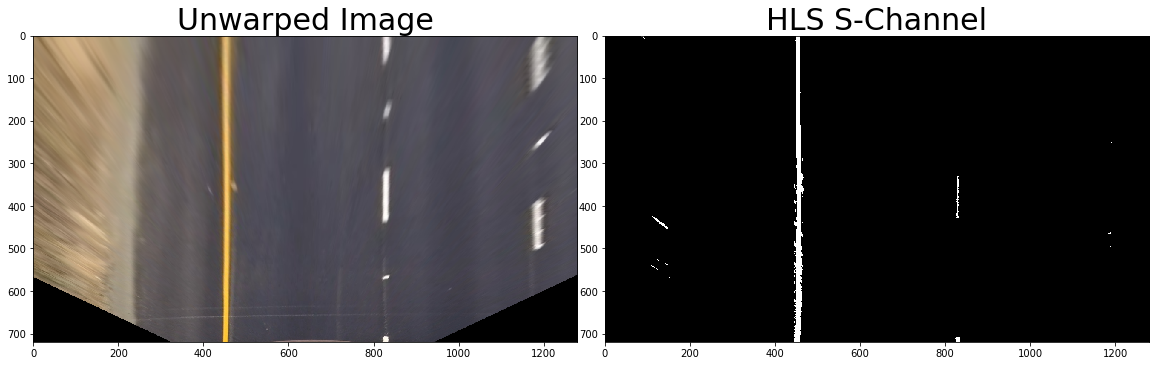

In [50]:
#visualise hls s channel threshold - S Channel is very helpful in identifying yellow lane markings
def update(min_thresh, max_thresh):
    exampleImg_SThresh = hls_sthresh(exampleImg_unwarp, (min_thresh, max_thresh))
    # Visualize hls s-channel threshold
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(exampleImg_unwarp)
    ax1.set_title('Unwarped Image', fontsize=30)
    ax2.imshow(exampleImg_SThresh, cmap='gray')
    ax2.set_title('HLS S-Channel', fontsize=30)

interact(update,
         min_thresh=(0,255), 
         max_thresh=(0,255))

print('...')

# HLS L Channel Threshold

In [51]:
# Define a function that thresholds the L-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_lthresh(img, thresh=(150, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_l = hls[:,:,1]
    hls_l = hls_l*(255/np.max(hls_l))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(hls_l)
    binary_output[(hls_l > thresh[0]) & (hls_l <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output
print('#')

#


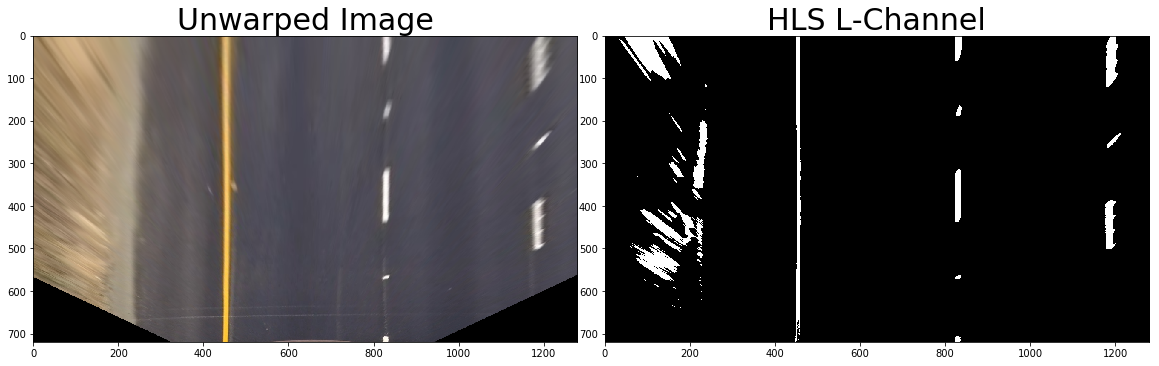

In [53]:
def update(min_thresh, max_thresh):
    exampleImg_LThresh = hls_lthresh(exampleImg_unwarp, (min_thresh, max_thresh))
    # Visualize hls l-channel threshold
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(exampleImg_unwarp)
    ax1.set_title('Unwarped Image', fontsize=30)
    ax2.imshow(exampleImg_LThresh, cmap='gray')
    ax2.set_title('HLS L-Channel', fontsize=30)

interact(update,
         min_thresh=(0,255), 
         max_thresh=(0,255))

print('#')

# Define Image Processing Pipeline


In [70]:
# Define the complete image processing pipeline, reads raw image and returns binary image with lane lines identified
def pipeline(img):
    # Undistort
    img_undistort = undistort(img)
    
    # Perspective Transform
    img_unwarp, M, Minv = unwarp(img_undistort, src, dst)

    # Sobel Absolute (using default parameters)
    img_sobelAbs = abs_sobel_thresh(img_unwarp)

    # Sobel Magnitude (using default parameters)
    img_sobelMag = mag_thresh(img_unwarp)
    
    # Sobel Direction (using default parameters)
    img_sobelDir = dir_thresh(img_unwarp)
    
    #combined_mag_dir_ Threshold (using default parameters)
    img_comb_thresh = np.zeros_like(img_sobelMag) 
    img_comb_thresh[((img_sobelMag == 1) & (img_sobelDir == 1))] = 1

    # HLS S-channel Threshold (using default parameters)
    img_SThresh = hls_sthresh(img_unwarp)

    # HLS L-channel Threshold (using default parameters)
    img_LThresh = hls_lthresh(img_unwarp)
    
    # Combine HLS L Channel and S Channel thresholds
    combined = np.zeros_like(img_LThresh)
    combined[(img_LThresh == 1) | (img_SThresh == 1)] = 1
    return combined, Minv
    
print('#')

#


# Run Pipeline on Test Images!

#


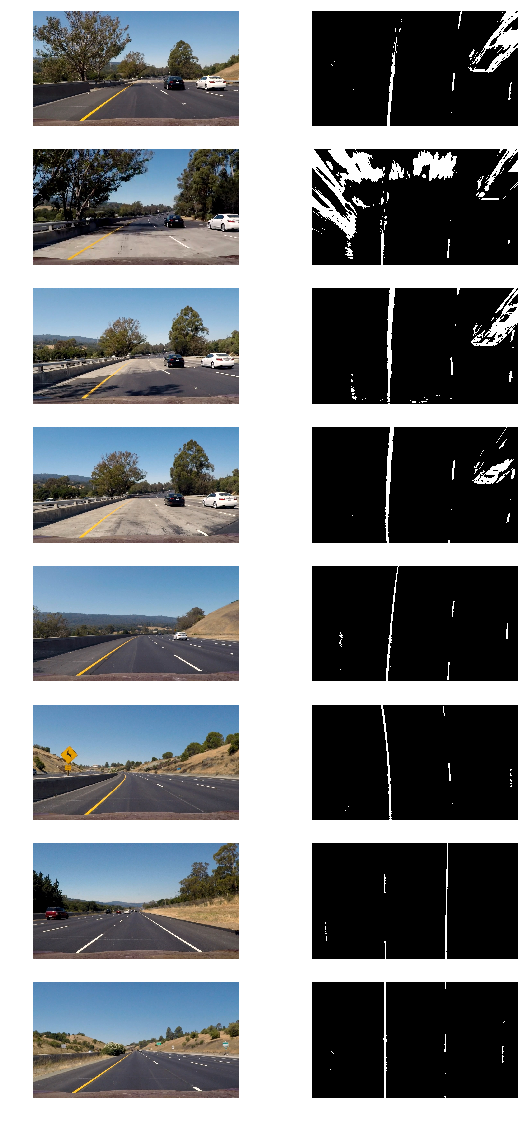

In [71]:

# Make a list of example images
images = glob.glob('./test_images/*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
                  
i = 0
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_bin, Minv = pipeline(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1

print('#')

# Sliding Window Polyfit

In [79]:
# Define method to fit polynomial to binary image with lines extracted, using sliding window
def sliding_window_polyfit(img):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    quarter_point = np.int(midpoint//2)
    # Previously the left/right base was the max of the left/right half of the histogram
    # this changes it so that only a quarter of the histogram (directly to the left/right) is considered
    leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
    rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint
    width_lane =rightx_base-leftx_base
    print (width_lane)
    #print('base pts:', leftx_base, rightx_base)

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualization_data = (rectangle_data, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data
print('#')

#


392
...


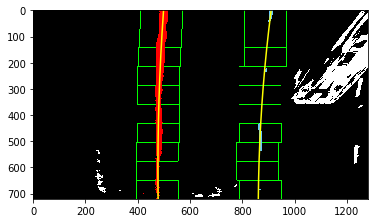

In [80]:
# visualize the result on example image
exampleImg = cv2.imread('./test_images/test4.jpg')
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
exampleImg_bin, Minv = pipeline(exampleImg)
    
left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = sliding_window_polyfit(exampleImg_bin)

h = exampleImg.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
#print('fit x-intercepts:', left_fit_x_int, right_fit_x_int)

rectangles = visualization_data[0]
histogram = visualization_data[1]

# Create an output image to draw on and  visualize the result
out_img = np.uint8(np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg_bin.shape[0]-1, exampleImg_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
for rect in rectangles:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
# Identify the x and y positions of all nonzero pixels in the image
nonzero = exampleImg_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

print('...')

...


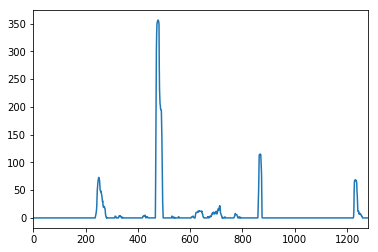

In [76]:
# Print histogram from sliding window polyfit for example image
plt.plot(histogram)
plt.xlim(0, 1280)
print('...')

# Polyfit using Fit from Previous Frame

In [77]:
# Define method to fit polynomial to binary image based upon a previous fit (chronologically speaking);
# this assumes that the fit will not change significantly from one video frame to the next
def polyfit_using_prev_fit(binary_warped, left_fit_prev, right_fit_prev):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] - margin)) & 
                      (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] - margin)) & 
                       (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    if len(leftx) != 0:
        # Fit a second order polynomial to each
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds
print('#')


#


#


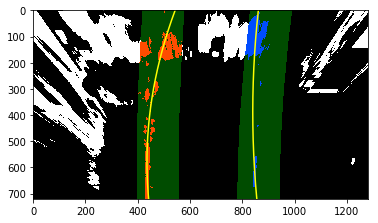

In [78]:
# visualize the result on example image
exampleImg2 = cv2.imread('./test_images/test5.jpg')
exampleImg2 = cv2.cvtColor(exampleImg2, cv2.COLOR_BGR2RGB)
exampleImg2_bin, Minv = pipeline(exampleImg2)   
margin = 80

left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = polyfit_using_prev_fit(exampleImg2_bin, left_fit, right_fit)

# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg2_bin.shape[0]-1, exampleImg2_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

# Create an image to draw on and an image to show the selection window
out_img = np.uint8(np.dstack((exampleImg2_bin, exampleImg2_bin, exampleImg2_bin))*255)
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
nonzero = exampleImg2_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds2], nonzerox[left_lane_inds2]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds2], nonzerox[right_lane_inds2]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area (OLD FIT)
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx2, ploty, color='yellow')
plt.plot(right_fitx2, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
print('#')

# Radius of Curvature and Distance from Lane Center Calculation¶


In [81]:
# Method to determine radius of curvature and distance from lane center 
# based on binary image, polynomial fit, and L and R lane pixel indices
def calc_curv_rad_and_center_dist(bin_img, l_fit, r_fit, l_lane_inds, r_lane_inds):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/392 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    return left_curverad, right_curverad, center_dist
print('#')

#


In [82]:
rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(exampleImg_bin, left_fit, right_fit, left_lane_inds, right_lane_inds)

print('Radius of curvature for example:', rad_l, 'm,', rad_r, 'm')
print('Distance from lane center for example:', d_center, 'm')


Radius of curvature for example: 1567.45260105 m, 1101.35467311 m
Distance from lane center for example: -0.2795713627 m


# Draw the Detected Lane Back onto the Original Image¶


In [89]:
def draw_lane(original_img, binary_img, l_fit, r_fit, Minv):
    new_img = np.copy(original_img)
    if l_fit is None or r_fit is None:
        return original_img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,0), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    return result
print('#')

#


#


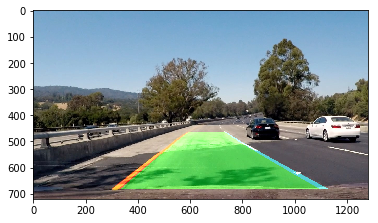

In [90]:
#test on example image
exampleImg_out1 = draw_lane(exampleImg, exampleImg_bin, left_fit, right_fit, Minv)
plt.imshow(exampleImg_out1)
print('#')

In [91]:
def draw_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img
print('#')

#


#


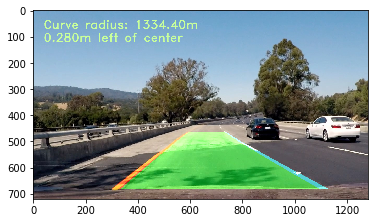

In [92]:
#test on example image
exampleImg_out2 = draw_data(exampleImg_out1, (rad_l+rad_r)/2, d_center)
plt.imshow(exampleImg_out2)
print('#')

# Define a Line Class for Storing Data

In [93]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)


            

print('#')

#


# Define Complete Image Processing Pipeline¶


In [97]:
def process_image(img):
    new_img = np.copy(img)
    img_bin, Minv = pipeline(new_img)
    
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, _ = sliding_window_polyfit(img_bin)
    else:
        l_fit, r_fit, l_lane_inds, r_lane_inds = polyfit_using_prev_fit(img_bin, l_line.best_fit, r_line.best_fit)
        
    # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
    if l_fit is not None and r_fit is not None:
        # calculate x-intercept (bottom of image, x=image_height) for fits
        h = img.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        if abs(350 - x_int_diff) > 100:
            l_fit = None
            r_fit = None
            
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)
    
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        img_out1 = draw_lane(new_img, img_bin, l_line.best_fit, r_line.best_fit, Minv)
        rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(img_bin, l_line.best_fit, r_line.best_fit, 
                                                               l_lane_inds, r_lane_inds)
        img_out = draw_data(img_out1, (rad_l+rad_r)/2, d_center)
    else:
        img_out = new_img
    
    diagnostic_output = False
    if diagnostic_output:
        # put together multi-view output
        diag_img = np.zeros((720,1280,3), dtype=np.uint8)
        
        # original output (top left)
        diag_img[0:360,0:640,:] = cv2.resize(img_out,(640,360))
        
        # binary overhead view (top right)
        img_bin = np.dstack((img_bin*255, img_bin*255, img_bin*255))
        resized_img_bin = cv2.resize(img_bin,(640,360))
        diag_img[0:360,640:1280, :] = resized_img_bin
        
        # overhead with all fits added (bottom right)
        img_bin_fit = np.copy(img_bin)
        for i, fit in enumerate(l_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (20*i+100,0,20*i+100))
        for i, fit in enumerate(r_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (0,20*i+100,20*i+100))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, l_line.best_fit, (255,255,0))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, r_line.best_fit, (255,255,0))
        diag_img[360:720,640:1280,:] = cv2.resize(img_bin_fit,(640,360))
        
        # diagnostic data (bottom left)
        color_ok = (200,255,155)
        color_bad = (255,155,155)
        font = cv2.FONT_HERSHEY_DUPLEX
        if l_fit is not None:
            text = 'This fit L: ' + ' {:0.6f}'.format(l_fit[0]) + \
                                    ' {:0.6f}'.format(l_fit[1]) + \
                                    ' {:0.6f}'.format(l_fit[2])
        else:
            text = 'This fit L: None'
        cv2.putText(diag_img, text, (40,380), font, .5, color_ok, 1, cv2.LINE_AA)
        if r_fit is not None:
            text = 'This fit R: ' + ' {:0.6f}'.format(r_fit[0]) + \
                                    ' {:0.6f}'.format(r_fit[1]) + \
                                    ' {:0.6f}'.format(r_fit[2])
        else:
            text = 'This fit R: None'
        cv2.putText(diag_img, text, (40,400), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit L: ' + ' {:0.6f}'.format(l_line.best_fit[0]) + \
                                ' {:0.6f}'.format(l_line.best_fit[1]) + \
                                ' {:0.6f}'.format(l_line.best_fit[2])
        cv2.putText(diag_img, text, (40,440), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit R: ' + ' {:0.6f}'.format(r_line.best_fit[0]) + \
                                ' {:0.6f}'.format(r_line.best_fit[1]) + \
                                ' {:0.6f}'.format(r_line.best_fit[2])
        cv2.putText(diag_img, text, (40,460), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Diffs L: ' + ' {:0.6f}'.format(l_line.diffs[0]) + \
                             ' {:0.6f}'.format(l_line.diffs[1]) + \
                             ' {:0.6f}'.format(l_line.diffs[2])
        if l_line.diffs[0] > 0.001 or \
           l_line.diffs[1] > 1.0 or \
           l_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,500), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Diffs R: ' + ' {:0.6f}'.format(r_line.diffs[0]) + \
                             ' {:0.6f}'.format(r_line.diffs[1]) + \
                             ' {:0.6f}'.format(r_line.diffs[2])
        if r_line.diffs[0] > 0.001 or \
           r_line.diffs[1] > 1.0 or \
           r_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,520), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Good fit count L:' + str(len(l_line.current_fit))
        cv2.putText(diag_img, text, (40,560), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Good fit count R:' + str(len(r_line.current_fit))
        cv2.putText(diag_img, text, (40,580), font, .5, color_ok, 1, cv2.LINE_AA)
        
        img_out = diag_img
    return img_out
print('#')

#


In [99]:
# Proess Video
from moviepy.editor import VideoFileClip

l_line = Line()
r_line = Line()
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

381
[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


 82%|████████▏ | 1040/1261 [04:45<01:05,  3.36it/s]

287


 83%|████████▎ | 1041/1261 [04:45<01:06,  3.32it/s]

307


 83%|████████▎ | 1042/1261 [04:45<01:05,  3.32it/s]

373


 83%|████████▎ | 1043/1261 [04:46<01:05,  3.33it/s]

238


 83%|████████▎ | 1044/1261 [04:46<01:04,  3.35it/s]

261


 83%|████████▎ | 1045/1261 [04:46<01:03,  3.38it/s]

252


 83%|████████▎ | 1046/1261 [04:46<01:02,  3.41it/s]

251


 83%|████████▎ | 1047/1261 [04:47<01:03,  3.38it/s]

253


 83%|████████▎ | 1048/1261 [04:47<01:01,  3.44it/s]

215


 83%|████████▎ | 1049/1261 [04:47<01:01,  3.45it/s]

423


 83%|████████▎ | 1050/1261 [04:48<01:00,  3.51it/s]

426


 83%|████████▎ | 1051/1261 [04:48<00:58,  3.62it/s]

417


100%|█████████▉| 1258/1261 [05:41<00:00,  3.95it/s]

392


100%|█████████▉| 1259/1261 [05:41<00:00,  3.94it/s]

394


100%|█████████▉| 1260/1261 [05:41<00:00,  3.58it/s]

392


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 6min 4s, sys: 1min, total: 7min 5s
Wall time: 5min 43s


In [100]:
# Process Challenge Video
l_line = Line()
r_line = Line()
video_output2 = 'challenge_video_output.mp4'
video_input2 = VideoFileClip('challenge_video.mp4')#.subclip(10,12)
#video_input2.save_frame("challenge01.jpeg", t=0.25) # saves the frame at time = 0.25s
processed_video = video_input2.fl_image(process_image)
%time processed_video.write_videofile(video_output2, audio=False)

342
[MoviePy] >>>> Building video challenge_video_output.mp4
[MoviePy] Writing video challenge_video_output.mp4


  1%|          | 3/485 [00:00<01:53,  4.25it/s]

347


  1%|          | 4/485 [00:00<01:52,  4.26it/s]

348


  1%|          | 5/485 [00:01<01:54,  4.18it/s]

348


  1%|          | 6/485 [00:01<01:53,  4.21it/s]

347


  1%|▏         | 7/485 [00:01<01:55,  4.15it/s]

338


  2%|▏         | 8/485 [00:01<01:57,  4.07it/s]

338


  2%|▏         | 10/485 [00:02<01:58,  4.02it/s]

337


  2%|▏         | 11/485 [00:02<01:57,  4.02it/s]

340


  3%|▎         | 13/485 [00:03<01:53,  4.15it/s]

343


  3%|▎         | 15/485 [00:03<01:48,  4.33it/s]

342


  4%|▍         | 19/485 [00:04<02:02,  3.81it/s]

332


  4%|▍         | 20/485 [00:04<02:02,  3.80it/s]

338


  5%|▍         | 22/485 [00:05<02:11,  3.53it/s]

334


  5%|▍         | 23/485 [00:05<02:19,  3.30it/s]

336


  5%|▍         | 24/485 [00:06<02:25,  3.17it/s]

334


  5%|▌         | 25/485 [00:06<02:17,  3.35it/s]

333


  5%|▌         | 26/485 [00:06<02:09,  3.55it/s]

332


  6%|▌         | 27/485 [00:06<02:02,  3.73it/s]

333


  6%|▌         | 29/485 [00:07<01:53,  4.00it/s]

331


  6%|▌         | 30/485 [00:07<01:51,  4.07it/s]

333


  7%|▋         | 33/485 [00:08<01:49,  4.13it/s]

320


  7%|▋         | 35/485 [00:08<01:48,  4.13it/s]

323


  7%|▋         | 36/485 [00:09<01:51,  4.03it/s]

319


  8%|▊         | 37/485 [00:09<01:52,  3.99it/s]

165


  8%|▊         | 38/485 [00:09<01:52,  3.96it/s]

163


  8%|▊         | 39/485 [00:09<01:51,  3.99it/s]

317


  8%|▊         | 40/485 [00:10<01:53,  3.92it/s]

166


  8%|▊         | 41/485 [00:10<01:52,  3.94it/s]

170


  9%|▊         | 42/485 [00:10<01:52,  3.95it/s]

319


  9%|▉         | 43/485 [00:10<01:54,  3.86it/s]

320


  9%|▉         | 44/485 [00:11<01:53,  3.89it/s]

320


  9%|▉         | 45/485 [00:11<01:53,  3.89it/s]

320


  9%|▉         | 46/485 [00:11<01:51,  3.93it/s]

316


 10%|▉         | 47/485 [00:11<01:52,  3.91it/s]

316


 10%|▉         | 48/485 [00:12<01:54,  3.83it/s]

312


 10%|█         | 49/485 [00:12<01:52,  3.88it/s]

311


 10%|█         | 50/485 [00:12<01:51,  3.89it/s]

315


 11%|█         | 51/485 [00:12<01:52,  3.87it/s]

315


 11%|█         | 52/485 [00:13<01:51,  3.89it/s]

313


 11%|█         | 53/485 [00:13<01:51,  3.86it/s]

315


 11%|█         | 54/485 [00:13<01:51,  3.86it/s]

472


 11%|█▏        | 55/485 [00:14<01:51,  3.87it/s]

469


 12%|█▏        | 56/485 [00:14<01:53,  3.80it/s]

472


 12%|█▏        | 57/485 [00:14<01:56,  3.69it/s]

467


 12%|█▏        | 59/485 [00:15<01:52,  3.78it/s]

311


 13%|█▎        | 61/485 [00:15<01:49,  3.88it/s]

313


 13%|█▎        | 63/485 [00:16<01:49,  3.84it/s]

314


 13%|█▎        | 64/485 [00:16<01:48,  3.87it/s]

477


 13%|█▎        | 65/485 [00:16<01:49,  3.82it/s]

476


 14%|█▎        | 66/485 [00:16<01:49,  3.82it/s]

471


 14%|█▍        | 67/485 [00:17<01:48,  3.86it/s]

468


 14%|█▍        | 68/485 [00:17<01:47,  3.86it/s]

461


 14%|█▍        | 69/485 [00:17<01:47,  3.86it/s]

456


 14%|█▍        | 70/485 [00:17<01:46,  3.89it/s]

434


 15%|█▍        | 71/485 [00:18<01:45,  3.92it/s]

440


 15%|█▍        | 72/485 [00:18<01:45,  3.92it/s]

276


 15%|█▌        | 73/485 [00:18<01:44,  3.95it/s]

279


 15%|█▌        | 74/485 [00:18<01:45,  3.88it/s]

288


 16%|█▌        | 76/485 [00:19<01:44,  3.90it/s]

298


 16%|█▌        | 77/485 [00:19<01:47,  3.78it/s]

320


 16%|█▌        | 78/485 [00:20<01:46,  3.83it/s]

332


 16%|█▋        | 79/485 [00:20<01:45,  3.86it/s]

328


 16%|█▋        | 80/485 [00:20<01:46,  3.80it/s]

326


 17%|█▋        | 81/485 [00:20<01:45,  3.85it/s]

482


 17%|█▋        | 82/485 [00:21<01:43,  3.88it/s]

325


 17%|█▋        | 84/485 [00:21<01:42,  3.91it/s]

481


 18%|█▊        | 85/485 [00:21<01:40,  3.97it/s]

479


 18%|█▊        | 86/485 [00:22<01:42,  3.91it/s]

477


 18%|█▊        | 87/485 [00:22<01:41,  3.92it/s]

476


 18%|█▊        | 88/485 [00:22<01:40,  3.94it/s]

287


 19%|█▊        | 90/485 [00:23<01:41,  3.88it/s]

327


 19%|█▉        | 91/485 [00:23<01:40,  3.93it/s]

330


 19%|█▉        | 92/485 [00:23<01:42,  3.85it/s]

501


 19%|█▉        | 93/485 [00:23<01:41,  3.85it/s]

500


 19%|█▉        | 94/485 [00:24<01:41,  3.87it/s]

499


 20%|█▉        | 95/485 [00:24<01:40,  3.88it/s]

494


 20%|█▉        | 96/485 [00:24<01:42,  3.81it/s]

491


 20%|██        | 97/485 [00:24<01:41,  3.84it/s]

486


 20%|██        | 98/485 [00:25<01:40,  3.87it/s]

484


 20%|██        | 99/485 [00:25<01:39,  3.89it/s]

483


 21%|██        | 100/485 [00:25<01:38,  3.91it/s]

269


 21%|██        | 101/485 [00:25<01:37,  3.92it/s]

278


 21%|██        | 102/485 [00:26<01:37,  3.93it/s]

283


 21%|██▏       | 104/485 [00:26<01:36,  3.94it/s]

320


 22%|██▏       | 105/485 [00:26<01:36,  3.93it/s]

336


 22%|██▏       | 106/485 [00:27<01:37,  3.90it/s]

334


 22%|██▏       | 107/485 [00:27<01:36,  3.93it/s]

333


 22%|██▏       | 108/485 [00:27<01:35,  3.94it/s]

319


 22%|██▏       | 109/485 [00:27<01:35,  3.93it/s]

318


 23%|██▎       | 110/485 [00:28<01:35,  3.93it/s]

311


 23%|██▎       | 111/485 [00:28<01:35,  3.91it/s]

307


 23%|██▎       | 112/485 [00:28<01:36,  3.88it/s]

309


 23%|██▎       | 113/485 [00:28<01:36,  3.85it/s]

315


 24%|██▎       | 114/485 [00:29<01:35,  3.89it/s]

314


 24%|██▎       | 115/485 [00:29<01:35,  3.86it/s]

315


 24%|██▍       | 116/485 [00:29<01:38,  3.74it/s]

319


 24%|██▍       | 117/485 [00:30<01:38,  3.74it/s]

337


 24%|██▍       | 118/485 [00:30<01:36,  3.79it/s]

328


 25%|██▍       | 119/485 [00:30<01:36,  3.78it/s]

328


 25%|██▍       | 120/485 [00:30<01:35,  3.83it/s]

323


 25%|██▍       | 121/485 [00:31<01:35,  3.81it/s]

319


 25%|██▌       | 122/485 [00:31<01:34,  3.82it/s]

318


 25%|██▌       | 123/485 [00:31<01:34,  3.85it/s]

315


 26%|██▌       | 124/485 [00:31<01:34,  3.81it/s]

314


 26%|██▌       | 125/485 [00:32<01:33,  3.85it/s]

316


 26%|██▌       | 126/485 [00:32<01:35,  3.77it/s]

316


 26%|██▌       | 127/485 [00:32<01:33,  3.83it/s]

317


 26%|██▋       | 128/485 [00:32<01:33,  3.80it/s]

317


 27%|██▋       | 129/485 [00:33<01:32,  3.85it/s]

317


 27%|██▋       | 130/485 [00:33<01:32,  3.85it/s]

319


 27%|██▋       | 131/485 [00:33<01:30,  3.91it/s]

303


 27%|██▋       | 132/485 [00:33<01:30,  3.88it/s]

442


 27%|██▋       | 133/485 [00:34<01:29,  3.95it/s]

221


 28%|██▊       | 134/485 [00:34<01:29,  3.91it/s]

278


 28%|██▊       | 135/485 [00:34<01:30,  3.88it/s]

268


 28%|██▊       | 136/485 [00:34<01:30,  3.87it/s]

253


 28%|██▊       | 137/485 [00:35<01:29,  3.90it/s]

269


 28%|██▊       | 138/485 [00:35<01:28,  3.90it/s]

271


 29%|██▊       | 139/485 [00:35<01:29,  3.86it/s]

272


 29%|██▉       | 140/485 [00:36<01:30,  3.82it/s]

247


 29%|██▉       | 141/485 [00:36<01:28,  3.87it/s]

463


 29%|██▉       | 142/485 [00:36<01:28,  3.87it/s]

453


 29%|██▉       | 143/485 [00:36<01:29,  3.84it/s]

460


 30%|██▉       | 144/485 [00:37<01:28,  3.83it/s]

499


 30%|██▉       | 145/485 [00:37<01:28,  3.85it/s]

497


 30%|███       | 146/485 [00:37<01:29,  3.80it/s]

502


 30%|███       | 147/485 [00:37<01:28,  3.84it/s]

500


 31%|███       | 148/485 [00:38<01:28,  3.83it/s]

273


 35%|███▍      | 169/485 [00:43<01:18,  4.02it/s]

310


 35%|███▌      | 170/485 [00:43<01:19,  3.98it/s]

299


 35%|███▌      | 171/485 [00:43<01:19,  3.93it/s]

298


 35%|███▌      | 172/485 [00:44<01:21,  3.86it/s]

319


 36%|███▌      | 173/485 [00:44<01:20,  3.86it/s]

320


 36%|███▌      | 174/485 [00:44<01:20,  3.86it/s]

321


 36%|███▌      | 175/485 [00:44<01:20,  3.86it/s]

309


 36%|███▋      | 176/485 [00:45<01:20,  3.82it/s]

317


 36%|███▋      | 177/485 [00:45<01:20,  3.83it/s]

319


 37%|███▋      | 178/485 [00:45<01:20,  3.83it/s]

315


 37%|███▋      | 179/485 [00:45<01:19,  3.83it/s]

316


 37%|███▋      | 180/485 [00:46<01:20,  3.80it/s]

317


 37%|███▋      | 181/485 [00:46<01:20,  3.79it/s]

318


 38%|███▊      | 182/485 [00:46<01:21,  3.72it/s]

314


 38%|███▊      | 183/485 [00:47<01:23,  3.60it/s]

309


 38%|███▊      | 184/485 [00:47<01:23,  3.60it/s]

305


 38%|███▊      | 185/485 [00:47<01:21,  3.67it/s]

310


 38%|███▊      | 186/485 [00:47<01:20,  3.72it/s]

329


 39%|███▉      | 188/485 [00:48<01:16,  3.86it/s]

326


 39%|███▉      | 189/485 [00:48<01:15,  3.92it/s]

320


 39%|███▉      | 190/485 [00:48<01:15,  3.91it/s]

320


 39%|███▉      | 191/485 [00:49<01:18,  3.73it/s]

320


 40%|███▉      | 192/485 [00:49<01:19,  3.71it/s]

315


 40%|███▉      | 193/485 [00:49<01:18,  3.70it/s]

316


 40%|████      | 194/485 [00:49<01:17,  3.75it/s]

317


 40%|████      | 195/485 [00:50<01:17,  3.72it/s]

313


 40%|████      | 196/485 [00:50<01:18,  3.70it/s]

306


 41%|████      | 197/485 [00:50<01:17,  3.73it/s]

309


 41%|████      | 198/485 [00:51<01:16,  3.74it/s]

314


 41%|████      | 199/485 [00:51<01:16,  3.73it/s]

323


 41%|████      | 200/485 [00:51<01:16,  3.73it/s]

324


 41%|████▏     | 201/485 [00:51<01:15,  3.76it/s]

325


 42%|████▏     | 202/485 [00:52<01:15,  3.77it/s]

322


 42%|████▏     | 203/485 [00:52<01:14,  3.76it/s]

319


 42%|████▏     | 204/485 [00:52<01:13,  3.80it/s]

310


 42%|████▏     | 206/485 [00:53<01:13,  3.82it/s]

303


 43%|████▎     | 207/485 [00:53<01:12,  3.85it/s]

310


 43%|████▎     | 209/485 [00:53<01:10,  3.89it/s]

307


 44%|████▎     | 211/485 [00:54<01:10,  3.90it/s]

310


 44%|████▎     | 212/485 [00:54<01:09,  3.91it/s]

308


 44%|████▍     | 213/485 [00:54<01:09,  3.89it/s]

320


 44%|████▍     | 214/485 [00:55<01:10,  3.86it/s]

318


 45%|████▍     | 216/485 [00:55<01:08,  3.91it/s]

321


 45%|████▌     | 219/485 [00:56<01:07,  3.96it/s]

316


 46%|████▌     | 221/485 [00:56<01:07,  3.91it/s]

314


 46%|████▌     | 222/485 [00:57<01:07,  3.89it/s]

316


 46%|████▌     | 224/485 [00:57<01:07,  3.85it/s]

313


 46%|████▋     | 225/485 [00:58<01:08,  3.80it/s]

308


 47%|████▋     | 227/485 [00:58<01:08,  3.78it/s]

320


 47%|████▋     | 228/485 [00:58<01:07,  3.81it/s]

319


 47%|████▋     | 229/485 [00:59<01:06,  3.83it/s]

315


 47%|████▋     | 230/485 [00:59<01:06,  3.84it/s]

315


 48%|████▊     | 231/485 [00:59<01:05,  3.86it/s]

317


 48%|████▊     | 232/485 [00:59<01:08,  3.68it/s]

317


 48%|████▊     | 234/485 [01:00<01:05,  3.84it/s]

315


 48%|████▊     | 235/485 [01:00<01:05,  3.83it/s]

312


 49%|████▊     | 236/485 [01:00<01:05,  3.81it/s]

315


 49%|████▉     | 237/485 [01:01<01:04,  3.86it/s]

315


 49%|████▉     | 239/485 [01:01<01:02,  3.94it/s]

278


 49%|████▉     | 240/485 [01:01<01:03,  3.86it/s]

285


 50%|████▉     | 241/485 [01:02<01:03,  3.83it/s]

316


 50%|████▉     | 242/485 [01:02<01:05,  3.72it/s]

319


 50%|█████     | 243/485 [01:02<01:04,  3.72it/s]

314


 50%|█████     | 244/485 [01:03<01:07,  3.59it/s]

318


 51%|█████     | 246/485 [01:03<01:09,  3.45it/s]

319


 51%|█████     | 248/485 [01:04<01:09,  3.41it/s]

318


 51%|█████▏    | 249/485 [01:04<01:08,  3.45it/s]

316


 52%|█████▏    | 251/485 [01:05<01:09,  3.38it/s]

310


 52%|█████▏    | 252/485 [01:05<01:11,  3.28it/s]

313


 52%|█████▏    | 253/485 [01:05<01:11,  3.26it/s]

312


 52%|█████▏    | 254/485 [01:06<01:06,  3.49it/s]

323


 53%|█████▎    | 255/485 [01:06<01:03,  3.61it/s]

310


 53%|█████▎    | 256/485 [01:06<01:02,  3.64it/s]

330


 53%|█████▎    | 258/485 [01:07<00:58,  3.85it/s]

321


 53%|█████▎    | 259/485 [01:07<01:01,  3.68it/s]

327


 54%|█████▍    | 261/485 [01:07<01:03,  3.54it/s]

323


 54%|█████▍    | 262/485 [01:08<01:03,  3.53it/s]

320


 54%|█████▍    | 263/485 [01:08<01:00,  3.69it/s]

319


 55%|█████▌    | 267/485 [01:09<00:53,  4.09it/s]

315


 55%|█████▌    | 268/485 [01:09<00:53,  4.05it/s]

328


 55%|█████▌    | 269/485 [01:09<00:52,  4.13it/s]

331


 56%|█████▌    | 270/485 [01:10<00:51,  4.18it/s]

332


 56%|█████▌    | 271/485 [01:10<00:50,  4.24it/s]

322


 56%|█████▌    | 272/485 [01:10<00:50,  4.23it/s]

324


 56%|█████▋    | 273/485 [01:10<00:50,  4.20it/s]

319


 56%|█████▋    | 274/485 [01:11<00:50,  4.21it/s]

318


 57%|█████▋    | 275/485 [01:11<00:49,  4.22it/s]

318


 57%|█████▋    | 276/485 [01:11<00:49,  4.20it/s]

307


 57%|█████▋    | 277/485 [01:11<00:50,  4.15it/s]

307


 57%|█████▋    | 278/485 [01:12<00:49,  4.16it/s]

312


 58%|█████▊    | 279/485 [01:12<00:48,  4.21it/s]

310


 58%|█████▊    | 280/485 [01:12<00:48,  4.20it/s]

310


 58%|█████▊    | 282/485 [01:12<00:48,  4.21it/s]

318


 58%|█████▊    | 283/485 [01:13<00:48,  4.16it/s]

316


 59%|█████▊    | 284/485 [01:13<00:48,  4.14it/s]

319


 59%|█████▉    | 285/485 [01:13<00:48,  4.13it/s]

321


 59%|█████▉    | 286/485 [01:13<00:47,  4.15it/s]

324


 59%|█████▉    | 287/485 [01:14<00:47,  4.19it/s]

323


 59%|█████▉    | 288/485 [01:14<00:47,  4.17it/s]

320


 60%|█████▉    | 289/485 [01:14<00:47,  4.15it/s]

320


 60%|█████▉    | 290/485 [01:14<00:46,  4.16it/s]

482


 60%|██████    | 291/485 [01:15<00:46,  4.18it/s]

481


 60%|██████    | 292/485 [01:15<00:46,  4.18it/s]

481


 60%|██████    | 293/485 [01:15<00:45,  4.18it/s]

482


 61%|██████    | 294/485 [01:15<00:46,  4.10it/s]

284


 61%|██████    | 295/485 [01:16<00:46,  4.12it/s]

291


 61%|██████    | 297/485 [01:16<00:45,  4.15it/s]

311


 62%|██████▏   | 299/485 [01:17<00:43,  4.24it/s]

323


 62%|██████▏   | 302/485 [01:17<00:43,  4.23it/s]

318


 62%|██████▏   | 303/485 [01:18<00:43,  4.15it/s]

313


 63%|██████▎   | 305/485 [01:18<00:43,  4.09it/s]

480


 63%|██████▎   | 306/485 [01:18<00:43,  4.09it/s]

276


 63%|██████▎   | 307/485 [01:18<00:42,  4.16it/s]

315


 64%|██████▎   | 308/485 [01:19<00:42,  4.19it/s]

286


 64%|██████▎   | 309/485 [01:19<00:42,  4.14it/s]

287


 64%|██████▍   | 310/485 [01:19<00:42,  4.11it/s]

296


 64%|██████▍   | 312/485 [01:20<00:41,  4.15it/s]

321


 65%|██████▍   | 313/485 [01:20<00:41,  4.10it/s]

320


 65%|██████▍   | 314/485 [01:20<00:41,  4.15it/s]

325


 65%|██████▍   | 315/485 [01:20<00:40,  4.16it/s]

315


 65%|██████▌   | 316/485 [01:21<00:40,  4.17it/s]

319


 65%|██████▌   | 317/485 [01:21<00:39,  4.21it/s]

317


 66%|██████▌   | 318/485 [01:21<00:39,  4.25it/s]

316


 66%|██████▌   | 319/485 [01:21<00:39,  4.20it/s]

316


 66%|██████▌   | 320/485 [01:22<00:39,  4.22it/s]

312


 66%|██████▌   | 321/485 [01:22<00:39,  4.14it/s]

314


 66%|██████▋   | 322/485 [01:22<00:39,  4.16it/s]

305


 67%|██████▋   | 323/485 [01:22<00:39,  4.15it/s]

306


 67%|██████▋   | 324/485 [01:23<00:38,  4.19it/s]

306


 67%|██████▋   | 325/485 [01:23<00:38,  4.18it/s]

320


 67%|██████▋   | 326/485 [01:23<00:38,  4.17it/s]

318


 67%|██████▋   | 327/485 [01:23<00:38,  4.15it/s]

320


 68%|██████▊   | 328/485 [01:24<00:38,  4.10it/s]

320


 68%|██████▊   | 329/485 [01:24<00:37,  4.18it/s]

308


 68%|██████▊   | 330/485 [01:24<00:36,  4.21it/s]

316


 68%|██████▊   | 331/485 [01:24<00:36,  4.20it/s]

314


 68%|██████▊   | 332/485 [01:24<00:36,  4.19it/s]

313


 69%|██████▊   | 333/485 [01:25<00:36,  4.21it/s]

313


 69%|██████▉   | 334/485 [01:25<00:36,  4.12it/s]

316


 69%|██████▉   | 335/485 [01:25<00:35,  4.17it/s]

314


 69%|██████▉   | 336/485 [01:25<00:35,  4.19it/s]

161


 69%|██████▉   | 337/485 [01:26<00:35,  4.19it/s]

315


 70%|██████▉   | 338/485 [01:26<00:34,  4.21it/s]

303


 70%|██████▉   | 339/485 [01:26<00:34,  4.18it/s]

310


 70%|███████   | 340/485 [01:26<00:34,  4.23it/s]

310


 70%|███████   | 341/485 [01:27<00:34,  4.20it/s]

172


 71%|███████   | 342/485 [01:27<00:34,  4.13it/s]

165


 71%|███████   | 343/485 [01:27<00:34,  4.12it/s]

310


 71%|███████▏  | 346/485 [01:28<00:32,  4.24it/s]

311


 72%|███████▏  | 349/485 [01:29<00:31,  4.27it/s]

308


 72%|███████▏  | 351/485 [01:29<00:31,  4.24it/s]

304


 73%|███████▎  | 352/485 [01:29<00:32,  4.15it/s]

308


 73%|███████▎  | 353/485 [01:29<00:31,  4.20it/s]

309


 73%|███████▎  | 356/485 [01:30<00:31,  4.15it/s]

308


 74%|███████▎  | 357/485 [01:30<00:31,  4.13it/s]

313


 74%|███████▍  | 358/485 [01:31<00:30,  4.12it/s]

312


 74%|███████▍  | 359/485 [01:31<00:30,  4.10it/s]

309


 74%|███████▍  | 361/485 [01:31<00:29,  4.16it/s]

309


 75%|███████▍  | 362/485 [01:32<00:29,  4.19it/s]

308


 75%|███████▍  | 363/485 [01:32<00:29,  4.09it/s]

308


 75%|███████▌  | 364/485 [01:32<00:29,  4.15it/s]

308


 75%|███████▌  | 366/485 [01:33<00:28,  4.14it/s]

301


 76%|███████▌  | 367/485 [01:33<00:28,  4.13it/s]

297


 76%|███████▌  | 368/485 [01:33<00:28,  4.10it/s]

295


 76%|███████▌  | 369/485 [01:33<00:28,  4.10it/s]

296


 76%|███████▋  | 371/485 [01:34<00:27,  4.15it/s]

308


 77%|███████▋  | 372/485 [01:34<00:27,  4.14it/s]

308


 77%|███████▋  | 373/485 [01:34<00:27,  4.10it/s]

310


 78%|███████▊  | 377/485 [01:35<00:25,  4.23it/s]

313


 78%|███████▊  | 378/485 [01:35<00:25,  4.22it/s]

309


 78%|███████▊  | 379/485 [01:36<00:25,  4.21it/s]

308


 78%|███████▊  | 380/485 [01:36<00:25,  4.17it/s]

307


 79%|███████▊  | 381/485 [01:36<00:24,  4.19it/s]

315


 79%|███████▉  | 383/485 [01:37<00:24,  4.24it/s]

317


 79%|███████▉  | 384/485 [01:37<00:23,  4.25it/s]

317


 79%|███████▉  | 385/485 [01:37<00:23,  4.20it/s]

317


 80%|███████▉  | 387/485 [01:38<00:23,  4.24it/s]

309


 80%|████████  | 388/485 [01:38<00:23,  4.17it/s]

313


 80%|████████  | 389/485 [01:38<00:22,  4.21it/s]

467


 80%|████████  | 390/485 [01:38<00:22,  4.25it/s]

318


 81%|████████  | 391/485 [01:39<00:22,  4.22it/s]

318


 81%|████████  | 392/485 [01:39<00:21,  4.24it/s]

322


 81%|████████  | 393/485 [01:39<00:21,  4.27it/s]

302


 81%|████████  | 394/485 [01:39<00:21,  4.16it/s]

302


 81%|████████▏ | 395/485 [01:40<00:21,  4.19it/s]

321


 82%|████████▏ | 396/485 [01:40<00:20,  4.25it/s]

318


 82%|████████▏ | 398/485 [01:40<00:20,  4.23it/s]

324


 82%|████████▏ | 399/485 [01:40<00:20,  4.21it/s]

315


 82%|████████▏ | 400/485 [01:41<00:19,  4.30it/s]

320


 83%|████████▎ | 401/485 [01:41<00:19,  4.24it/s]

322


 83%|████████▎ | 402/485 [01:41<00:19,  4.27it/s]

321


 83%|████████▎ | 403/485 [01:41<00:19,  4.28it/s]

322


 84%|████████▍ | 407/485 [01:42<00:18,  4.27it/s]

314


 84%|████████▍ | 408/485 [01:43<00:18,  4.26it/s]

310


 84%|████████▍ | 409/485 [01:43<00:17,  4.28it/s]

316


 85%|████████▍ | 410/485 [01:43<00:17,  4.30it/s]

321


 85%|████████▍ | 411/485 [01:43<00:17,  4.27it/s]

328


 85%|████████▍ | 412/485 [01:44<00:17,  4.23it/s]

326


 85%|████████▌ | 413/485 [01:44<00:16,  4.26it/s]

327


 86%|████████▌ | 416/485 [01:44<00:16,  4.31it/s]

321


 86%|████████▌ | 417/485 [01:45<00:16,  4.23it/s]

327


 86%|████████▌ | 418/485 [01:45<00:15,  4.22it/s]

319


 86%|████████▋ | 419/485 [01:45<00:15,  4.27it/s]

318


 87%|████████▋ | 420/485 [01:45<00:15,  4.22it/s]

325


 87%|████████▋ | 421/485 [01:46<00:15,  4.15it/s]

310


 87%|████████▋ | 422/485 [01:46<00:15,  4.14it/s]

325


 87%|████████▋ | 423/485 [01:46<00:14,  4.19it/s]

330


 87%|████████▋ | 424/485 [01:46<00:14,  4.23it/s]

329


 88%|████████▊ | 425/485 [01:47<00:14,  4.21it/s]

326


 88%|████████▊ | 426/485 [01:47<00:14,  4.20it/s]

324


 88%|████████▊ | 427/485 [01:47<00:13,  4.26it/s]

322


 88%|████████▊ | 428/485 [01:47<00:13,  4.26it/s]

408


 88%|████████▊ | 429/485 [01:48<00:13,  4.26it/s]

315


 89%|████████▊ | 430/485 [01:48<00:13,  4.21it/s]

325


 89%|████████▉ | 431/485 [01:48<00:12,  4.20it/s]

328


 89%|████████▉ | 432/485 [01:48<00:12,  4.22it/s]

332


 89%|████████▉ | 434/485 [01:49<00:12,  4.19it/s]

329


 90%|████████▉ | 435/485 [01:49<00:12,  4.12it/s]

336


 90%|████████▉ | 436/485 [01:49<00:11,  4.14it/s]

335


 91%|█████████ | 439/485 [01:50<00:10,  4.22it/s]

335


 91%|█████████ | 441/485 [01:50<00:10,  4.30it/s]

337


 91%|█████████ | 442/485 [01:51<00:10,  4.22it/s]

331


 91%|█████████▏| 443/485 [01:51<00:09,  4.25it/s]

335


 92%|█████████▏| 444/485 [01:51<00:09,  4.25it/s]

333


 92%|█████████▏| 446/485 [01:52<00:09,  4.23it/s]

325


 92%|█████████▏| 448/485 [01:52<00:08,  4.24it/s]

321


 93%|█████████▎| 449/485 [01:52<00:08,  4.28it/s]

324


 93%|█████████▎| 450/485 [01:53<00:08,  4.28it/s]

330


 93%|█████████▎| 452/485 [01:53<00:07,  4.27it/s]

192


 93%|█████████▎| 453/485 [01:53<00:07,  4.16it/s]

196


 94%|█████████▎| 454/485 [01:53<00:07,  4.19it/s]

337


 94%|█████████▍| 458/485 [01:54<00:06,  4.26it/s]

335


 95%|█████████▌| 461/485 [01:55<00:05,  4.24it/s]

333


 96%|█████████▌| 465/485 [01:56<00:04,  4.26it/s]

337


 96%|█████████▌| 466/485 [01:56<00:04,  4.26it/s]

340


 96%|█████████▋| 468/485 [01:57<00:04,  4.02it/s]

336


 97%|█████████▋| 470/485 [01:57<00:03,  3.89it/s]

335


 97%|█████████▋| 471/485 [01:58<00:03,  3.89it/s]

332


 97%|█████████▋| 472/485 [01:58<00:03,  3.90it/s]

337


 98%|█████████▊| 473/485 [01:58<00:03,  3.82it/s]

340


 98%|█████████▊| 474/485 [01:58<00:02,  3.77it/s]

345


 98%|█████████▊| 475/485 [01:59<00:02,  3.86it/s]

340


 98%|█████████▊| 476/485 [01:59<00:02,  3.90it/s]

336


 98%|█████████▊| 477/485 [01:59<00:02,  3.82it/s]

341


 99%|█████████▊| 478/485 [01:59<00:01,  3.75it/s]

336


 99%|█████████▉| 479/485 [02:00<00:01,  3.84it/s]

332


 99%|█████████▉| 480/485 [02:00<00:01,  3.98it/s]

325


 99%|█████████▉| 482/485 [02:00<00:00,  4.05it/s]

326


100%|█████████▉| 483/485 [02:01<00:00,  4.12it/s]

329


100%|█████████▉| 484/485 [02:01<00:00,  4.13it/s]

335


100%|██████████| 485/485 [02:01<00:00,  4.19it/s]

335


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_output.mp4 

CPU times: user 2min 16s, sys: 19 s, total: 2min 35s
Wall time: 2min 3s


In [101]:
l_line = Line()
r_line = Line()
video_output3 = 'harder_challenge_video_output.mp4'
video_input3 = VideoFileClip('harder_challenge_video.mp4')#.subclip(0,3)
#video_input3.save_frame("hard_challenge01.jpeg") # saves the first frame
processed_video = video_input3.fl_image(process_image)
%time processed_video.write_videofile(video_output3, audio=False)

360
[MoviePy] >>>> Building video harder_challenge_video_output.mp4
[MoviePy] Writing video harder_challenge_video_output.mp4


  2%|▏         | 25/1200 [00:06<05:05,  3.85it/s]

366


  2%|▏         | 26/1200 [00:06<05:03,  3.87it/s]

368


  2%|▏         | 27/1200 [00:06<05:07,  3.81it/s]

370


  2%|▏         | 28/1200 [00:07<05:13,  3.74it/s]

372


  2%|▏         | 29/1200 [00:07<05:09,  3.78it/s]

374


  2%|▎         | 30/1200 [00:07<05:10,  3.76it/s]

375


  3%|▎         | 31/1200 [00:08<05:13,  3.73it/s]

376


  3%|▎         | 32/1200 [00:08<05:11,  3.74it/s]

377


  3%|▎         | 33/1200 [00:08<05:18,  3.66it/s]

383


  3%|▎         | 34/1200 [00:08<05:18,  3.66it/s]

382


  3%|▎         | 35/1200 [00:09<05:15,  3.69it/s]

381


  3%|▎         | 36/1200 [00:09<05:16,  3.68it/s]

419


  3%|▎         | 37/1200 [00:09<05:21,  3.61it/s]

415


  3%|▎         | 38/1200 [00:09<05:18,  3.65it/s]

381


  3%|▎         | 39/1200 [00:10<05:23,  3.58it/s]

377


  3%|▎         | 40/1200 [00:10<05:19,  3.63it/s]

375


  3%|▎         | 41/1200 [00:10<05:17,  3.65it/s]

374


  4%|▎         | 42/1200 [00:11<05:18,  3.63it/s]

373


  4%|▎         | 43/1200 [00:11<05:24,  3.57it/s]

372


  4%|▎         | 44/1200 [00:11<05:24,  3.56it/s]

371


  4%|▍         | 45/1200 [00:11<05:18,  3.63it/s]

371


  4%|▍         | 46/1200 [00:12<05:14,  3.67it/s]

369


  4%|▍         | 47/1200 [00:12<05:12,  3.68it/s]

449


  4%|▍         | 48/1200 [00:12<05:20,  3.60it/s]

369


  4%|▍         | 49/1200 [00:13<05:24,  3.55it/s]

368


  4%|▍         | 50/1200 [00:13<05:26,  3.52it/s]

454


  4%|▍         | 51/1200 [00:13<05:33,  3.45it/s]

460


  4%|▍         | 52/1200 [00:13<05:33,  3.44it/s]

461


  4%|▍         | 53/1200 [00:14<05:34,  3.43it/s]

463


  4%|▍         | 54/1200 [00:14<05:35,  3.42it/s]

466


  5%|▍         | 55/1200 [00:14<05:33,  3.43it/s]

452


  5%|▍         | 56/1200 [00:15<05:29,  3.47it/s]

456


  5%|▍         | 57/1200 [00:15<05:25,  3.51it/s]

455


  5%|▍         | 58/1200 [00:15<05:21,  3.55it/s]

451


  5%|▍         | 59/1200 [00:15<05:21,  3.54it/s]

460


  5%|▌         | 60/1200 [00:16<05:28,  3.47it/s]

444


  5%|▌         | 62/1200 [00:16<05:23,  3.51it/s]

463


  5%|▌         | 63/1200 [00:17<05:20,  3.55it/s]

447


  6%|▌         | 69/1200 [00:18<05:15,  3.59it/s]

458


  6%|▌         | 70/1200 [00:19<05:18,  3.55it/s]

455


  6%|▌         | 71/1200 [00:19<05:18,  3.54it/s]

464


  6%|▌         | 72/1200 [00:19<05:17,  3.55it/s]

448


  6%|▌         | 73/1200 [00:19<05:16,  3.56it/s]

450


  6%|▌         | 74/1200 [00:20<05:13,  3.59it/s]

465


  6%|▋         | 75/1200 [00:20<05:16,  3.56it/s]

467


  6%|▋         | 76/1200 [00:20<05:17,  3.54it/s]

472


  6%|▋         | 77/1200 [00:21<05:15,  3.56it/s]

474


  7%|▋         | 88/1200 [00:24<05:03,  3.66it/s]

364


  7%|▋         | 89/1200 [00:24<05:04,  3.65it/s]

358


  8%|▊         | 90/1200 [00:24<05:02,  3.66it/s]

361


  8%|▊         | 91/1200 [00:24<04:59,  3.71it/s]

354


  8%|▊         | 92/1200 [00:25<05:01,  3.67it/s]

358


  8%|▊         | 93/1200 [00:25<05:02,  3.67it/s]

360


  8%|▊         | 94/1200 [00:25<04:59,  3.69it/s]

359


  8%|▊         | 95/1200 [00:25<05:00,  3.68it/s]

364


  8%|▊         | 96/1200 [00:26<05:11,  3.55it/s]

367


  8%|▊         | 97/1200 [00:26<05:04,  3.62it/s]

363


  8%|▊         | 98/1200 [00:26<05:04,  3.62it/s]

340


  8%|▊         | 99/1200 [00:27<05:05,  3.60it/s]

351


  8%|▊         | 100/1200 [00:27<05:05,  3.60it/s]

368


  8%|▊         | 101/1200 [00:27<05:07,  3.58it/s]

509


  8%|▊         | 102/1200 [00:27<05:05,  3.59it/s]

504


  9%|▊         | 103/1200 [00:28<05:03,  3.62it/s]

492


  9%|▊         | 104/1200 [00:28<05:00,  3.65it/s]

467


  9%|▉         | 105/1200 [00:28<05:01,  3.64it/s]

460


  9%|▉         | 106/1200 [00:29<05:06,  3.57it/s]

477


  9%|▉         | 107/1200 [00:29<05:08,  3.54it/s]

487


  9%|▉         | 108/1200 [00:29<05:09,  3.53it/s]

493


  9%|▉         | 109/1200 [00:29<05:10,  3.51it/s]

497


  9%|▉         | 110/1200 [00:30<05:13,  3.47it/s]

507


  9%|▉         | 113/1200 [00:30<04:57,  3.66it/s]

226


 10%|▉         | 114/1200 [00:31<05:00,  3.62it/s]

231


 10%|▉         | 115/1200 [00:31<04:58,  3.64it/s]

240


 10%|▉         | 116/1200 [00:31<04:58,  3.63it/s]

251


 10%|▉         | 117/1200 [00:32<04:58,  3.63it/s]

344


 10%|▉         | 118/1200 [00:32<04:56,  3.65it/s]

364


 10%|▉         | 119/1200 [00:32<04:55,  3.65it/s]

360


 10%|█         | 120/1200 [00:32<04:54,  3.67it/s]

363


 10%|█         | 121/1200 [00:33<04:52,  3.69it/s]

355


 10%|█         | 122/1200 [00:33<04:53,  3.68it/s]

350


 10%|█         | 123/1200 [00:33<04:54,  3.66it/s]

348


 10%|█         | 124/1200 [00:33<04:54,  3.66it/s]

346


 10%|█         | 125/1200 [00:34<04:54,  3.65it/s]

342


 10%|█         | 126/1200 [00:34<04:52,  3.67it/s]

343


 11%|█         | 127/1200 [00:34<04:47,  3.73it/s]

345


 11%|█         | 128/1200 [00:35<04:46,  3.74it/s]

346


 11%|█         | 129/1200 [00:35<04:50,  3.69it/s]

349


 11%|█         | 130/1200 [00:35<04:51,  3.66it/s]

340


 11%|█         | 131/1200 [00:35<05:00,  3.55it/s]

337


 11%|█         | 132/1200 [00:36<05:07,  3.48it/s]

336


 11%|█         | 133/1200 [00:36<05:10,  3.43it/s]

337


 11%|█         | 134/1200 [00:36<05:04,  3.50it/s]

335


 11%|█▏        | 135/1200 [00:37<05:01,  3.54it/s]

336


 11%|█▏        | 136/1200 [00:37<04:58,  3.57it/s]

336


 11%|█▏        | 137/1200 [00:37<04:58,  3.56it/s]

336


 12%|█▏        | 138/1200 [00:37<04:53,  3.62it/s]

338


 12%|█▏        | 139/1200 [00:38<04:53,  3.62it/s]

337


 12%|█▏        | 140/1200 [00:38<04:52,  3.63it/s]

336


 12%|█▏        | 141/1200 [00:38<04:50,  3.65it/s]

337


 12%|█▏        | 142/1200 [00:38<04:52,  3.62it/s]

339


 12%|█▏        | 143/1200 [00:39<04:49,  3.65it/s]

340


 12%|█▏        | 144/1200 [00:39<04:50,  3.63it/s]

342


 12%|█▏        | 145/1200 [00:39<04:48,  3.66it/s]

344


 12%|█▏        | 146/1200 [00:40<04:50,  3.63it/s]

348


 12%|█▏        | 147/1200 [00:40<04:46,  3.67it/s]

349


 12%|█▏        | 148/1200 [00:40<04:46,  3.67it/s]

352


 12%|█▏        | 149/1200 [00:40<04:43,  3.71it/s]

356


 12%|█▎        | 150/1200 [00:41<04:41,  3.74it/s]

162


 13%|█▎        | 151/1200 [00:41<04:45,  3.68it/s]

170


 13%|█▎        | 152/1200 [00:41<04:42,  3.70it/s]

165


 13%|█▎        | 153/1200 [00:41<04:44,  3.68it/s]

165


 13%|█▎        | 154/1200 [00:42<04:42,  3.70it/s]

168


 13%|█▎        | 155/1200 [00:42<04:46,  3.64it/s]

159


 13%|█▎        | 156/1200 [00:42<04:43,  3.68it/s]

163


 13%|█▎        | 157/1200 [00:43<04:44,  3.67it/s]

183


 13%|█▎        | 158/1200 [00:43<04:41,  3.70it/s]

187


 13%|█▎        | 159/1200 [00:43<04:38,  3.73it/s]

171


 13%|█▎        | 160/1200 [00:43<04:44,  3.65it/s]

206


 13%|█▎        | 161/1200 [00:44<04:38,  3.73it/s]

210


 14%|█▎        | 162/1200 [00:44<04:43,  3.66it/s]

169


 14%|█▎        | 163/1200 [00:44<04:37,  3.74it/s]

172


 14%|█▎        | 164/1200 [00:44<04:35,  3.77it/s]

169


 14%|█▍        | 165/1200 [00:45<04:34,  3.77it/s]

159


 14%|█▍        | 166/1200 [00:45<04:34,  3.77it/s]

165


 14%|█▍        | 167/1200 [00:45<04:32,  3.79it/s]

391


 14%|█▍        | 172/1200 [00:47<04:22,  3.92it/s]

424


 14%|█▍        | 173/1200 [00:47<04:21,  3.93it/s]

476


 14%|█▍        | 174/1200 [00:47<04:18,  3.97it/s]

352


 15%|█▍        | 175/1200 [00:47<04:15,  4.01it/s]

391


 15%|█▍        | 177/1200 [00:48<04:12,  4.05it/s]

381


 15%|█▍        | 178/1200 [00:48<04:10,  4.09it/s]

481


 15%|█▍        | 179/1200 [00:48<04:09,  4.10it/s]

468


 15%|█▌        | 180/1200 [00:48<04:13,  4.03it/s]

403


 15%|█▌        | 181/1200 [00:49<04:15,  3.98it/s]

396


 15%|█▌        | 182/1200 [00:49<04:13,  4.01it/s]

386


 15%|█▌        | 183/1200 [00:49<04:10,  4.07it/s]

398


 15%|█▌        | 184/1200 [00:49<04:12,  4.03it/s]

406


 15%|█▌        | 185/1200 [00:50<04:09,  4.07it/s]

414


 16%|█▌        | 186/1200 [00:50<04:08,  4.09it/s]

398


 16%|█▌        | 187/1200 [00:50<04:11,  4.02it/s]

418


 16%|█▌        | 188/1200 [00:50<04:20,  3.89it/s]

558


 16%|█▌        | 189/1200 [00:51<04:24,  3.82it/s]

320


 16%|█▌        | 190/1200 [00:51<04:34,  3.68it/s]

320


 16%|█▌        | 191/1200 [00:51<04:32,  3.70it/s]

381


 16%|█▌        | 192/1200 [00:52<04:29,  3.74it/s]

361


 16%|█▌        | 193/1200 [00:52<04:28,  3.75it/s]

345


 16%|█▌        | 194/1200 [00:52<04:55,  3.41it/s]

5


 16%|█▋        | 195/1200 [00:52<04:46,  3.51it/s]

14


 16%|█▋        | 196/1200 [00:53<05:05,  3.29it/s]

31


 16%|█▋        | 197/1200 [00:53<05:04,  3.30it/s]

48


 16%|█▋        | 198/1200 [00:53<05:04,  3.30it/s]

64


 17%|█▋        | 199/1200 [00:54<05:04,  3.29it/s]

79


 17%|█▋        | 200/1200 [00:54<05:08,  3.24it/s]

412


 17%|█▋        | 202/1200 [00:55<05:07,  3.24it/s]

419


 17%|█▋        | 203/1200 [00:55<05:06,  3.25it/s]

446


 17%|█▋        | 204/1200 [00:55<05:52,  2.82it/s]

458


 17%|█▋        | 205/1200 [00:56<07:25,  2.23it/s]

467


 17%|█▋        | 206/1200 [00:57<07:18,  2.26it/s]

390


 17%|█▋        | 207/1200 [00:57<06:49,  2.43it/s]

386


 17%|█▋        | 209/1200 [00:58<06:04,  2.72it/s]

380


 18%|█▊        | 211/1200 [00:58<05:48,  2.84it/s]

377


 18%|█▊        | 215/1200 [00:59<05:18,  3.09it/s]

369


 18%|█▊        | 217/1200 [01:00<05:15,  3.12it/s]

370


 18%|█▊        | 219/1200 [01:01<05:21,  3.06it/s]

215


 18%|█▊        | 220/1200 [01:01<05:19,  3.07it/s]

215


 18%|█▊        | 221/1200 [01:01<05:28,  2.98it/s]

218


 18%|█▊        | 222/1200 [01:02<05:30,  2.96it/s]

220


 19%|█▊        | 223/1200 [01:02<05:28,  2.98it/s]

230


 19%|█▊        | 224/1200 [01:02<05:31,  2.95it/s]

232


 19%|█▉        | 225/1200 [01:03<05:27,  2.98it/s]

224


 19%|█▉        | 226/1200 [01:03<05:33,  2.92it/s]

227


 19%|█▉        | 227/1200 [01:03<05:33,  2.92it/s]

237


 19%|█▉        | 228/1200 [01:04<05:34,  2.91it/s]

241


 19%|█▉        | 229/1200 [01:04<05:38,  2.87it/s]

244


 19%|█▉        | 230/1200 [01:05<05:36,  2.88it/s]

246


 19%|█▉        | 231/1200 [01:05<05:36,  2.88it/s]

244


 19%|█▉        | 232/1200 [01:05<05:39,  2.85it/s]

239


 19%|█▉        | 233/1200 [01:06<05:40,  2.84it/s]

441


 20%|█▉        | 237/1200 [01:07<05:25,  2.96it/s]

327


 20%|█▉        | 238/1200 [01:07<05:27,  2.94it/s]

334


 20%|█▉        | 239/1200 [01:08<05:31,  2.90it/s]

342


 20%|██        | 240/1200 [01:08<05:35,  2.86it/s]

349


 20%|██        | 241/1200 [01:08<05:43,  2.79it/s]

356


 20%|██        | 242/1200 [01:09<05:46,  2.77it/s]

363


 20%|██        | 243/1200 [01:09<05:50,  2.73it/s]

372


 20%|██        | 244/1200 [01:10<05:50,  2.73it/s]

368


 20%|██        | 245/1200 [01:10<05:50,  2.72it/s]

375


 20%|██        | 246/1200 [01:10<05:53,  2.70it/s]

372


 21%|██        | 247/1200 [01:11<05:50,  2.72it/s]

373


 21%|██        | 248/1200 [01:11<05:51,  2.71it/s]

374


 21%|██        | 249/1200 [01:11<05:53,  2.69it/s]

378


 21%|██        | 250/1200 [01:12<05:51,  2.70it/s]

379


 21%|██        | 251/1200 [01:12<05:47,  2.73it/s]

375


 21%|██        | 252/1200 [01:12<05:45,  2.74it/s]

421


 21%|██        | 253/1200 [01:13<05:53,  2.68it/s]

425


 21%|██        | 254/1200 [01:13<05:49,  2.71it/s]

409


 21%|██▏       | 255/1200 [01:14<05:51,  2.69it/s]

402


 21%|██▏       | 256/1200 [01:14<05:43,  2.75it/s]

402


 21%|██▏       | 257/1200 [01:14<05:37,  2.80it/s]

409


 22%|██▏       | 258/1200 [01:15<05:29,  2.86it/s]

397


 22%|██▏       | 259/1200 [01:15<05:18,  2.95it/s]

382


 22%|██▏       | 260/1200 [01:15<05:12,  3.00it/s]

380


 22%|██▏       | 261/1200 [01:16<05:10,  3.02it/s]

379


 22%|██▏       | 262/1200 [01:16<05:13,  2.99it/s]

401


 22%|██▏       | 263/1200 [01:16<05:17,  2.95it/s]

404


 22%|██▏       | 264/1200 [01:17<05:18,  2.94it/s]

387


 22%|██▏       | 265/1200 [01:17<05:17,  2.95it/s]

380


 22%|██▏       | 266/1200 [01:17<05:30,  2.82it/s]

375


 22%|██▏       | 267/1200 [01:18<05:19,  2.92it/s]

382


 22%|██▏       | 268/1200 [01:18<05:09,  3.01it/s]

383


 22%|██▏       | 269/1200 [01:18<04:59,  3.11it/s]

390


 22%|██▎       | 270/1200 [01:19<04:53,  3.16it/s]

382


 23%|██▎       | 271/1200 [01:19<05:00,  3.09it/s]

394


 23%|██▎       | 272/1200 [01:19<04:57,  3.12it/s]

395


 23%|██▎       | 273/1200 [01:19<04:47,  3.22it/s]

398


 23%|██▎       | 274/1200 [01:20<04:40,  3.30it/s]

264


 23%|██▎       | 275/1200 [01:20<04:35,  3.35it/s]

270


 23%|██▎       | 276/1200 [01:20<04:35,  3.35it/s]

275


 23%|██▎       | 277/1200 [01:21<04:32,  3.38it/s]

341


 23%|██▎       | 278/1200 [01:21<04:33,  3.37it/s]

356


 23%|██▎       | 279/1200 [01:21<04:30,  3.41it/s]

337


 23%|██▎       | 280/1200 [01:22<04:27,  3.44it/s]

341


 23%|██▎       | 281/1200 [01:22<04:23,  3.49it/s]

341


 24%|██▎       | 283/1200 [01:22<04:33,  3.35it/s]

358


 24%|██▍       | 285/1200 [01:23<04:57,  3.07it/s]

372


 24%|██▍       | 286/1200 [01:23<04:57,  3.08it/s]

372


 24%|██▍       | 287/1200 [01:24<05:05,  2.98it/s]

372


 24%|██▍       | 288/1200 [01:24<05:02,  3.01it/s]

367


 24%|██▍       | 289/1200 [01:24<05:00,  3.04it/s]

363


 24%|██▍       | 290/1200 [01:25<05:09,  2.94it/s]

390


 24%|██▍       | 291/1200 [01:25<05:22,  2.82it/s]

386


 24%|██▍       | 292/1200 [01:26<05:16,  2.87it/s]

387


 24%|██▍       | 293/1200 [01:26<05:05,  2.97it/s]

402


 24%|██▍       | 294/1200 [01:26<04:54,  3.07it/s]

411


 25%|██▌       | 302/1200 [01:28<04:07,  3.62it/s]

512


 25%|██▌       | 304/1200 [01:29<03:57,  3.77it/s]

498


 25%|██▌       | 305/1200 [01:29<03:54,  3.82it/s]

493


 26%|██▌       | 306/1200 [01:29<03:49,  3.90it/s]

333


 26%|██▌       | 307/1200 [01:30<03:45,  3.97it/s]

333


 26%|██▌       | 308/1200 [01:30<03:46,  3.93it/s]

325


 26%|██▌       | 309/1200 [01:30<04:00,  3.70it/s]

481


 26%|██▌       | 310/1200 [01:30<04:02,  3.67it/s]

480


 26%|██▌       | 311/1200 [01:31<04:02,  3.67it/s]

480


 26%|██▌       | 312/1200 [01:31<04:01,  3.68it/s]

478


 26%|██▌       | 313/1200 [01:31<04:01,  3.67it/s]

322


 26%|██▌       | 314/1200 [01:32<04:04,  3.63it/s]

313


 26%|██▋       | 316/1200 [01:32<04:09,  3.54it/s]

313


 26%|██▋       | 317/1200 [01:32<04:11,  3.51it/s]

315


 26%|██▋       | 318/1200 [01:33<04:12,  3.49it/s]

333


 27%|██▋       | 319/1200 [01:33<04:10,  3.51it/s]

348


 27%|██▋       | 320/1200 [01:33<04:06,  3.58it/s]

346


 27%|██▋       | 321/1200 [01:34<04:02,  3.63it/s]

415


 27%|██▋       | 322/1200 [01:34<04:00,  3.64it/s]

339


 27%|██▋       | 323/1200 [01:34<03:59,  3.66it/s]

438


 27%|██▋       | 324/1200 [01:34<04:03,  3.60it/s]

441


 27%|██▋       | 325/1200 [01:35<04:10,  3.49it/s]

433


 27%|██▋       | 326/1200 [01:35<04:29,  3.24it/s]

435


 27%|██▋       | 327/1200 [01:35<04:39,  3.13it/s]

431


 27%|██▋       | 328/1200 [01:36<04:53,  2.97it/s]

425


 27%|██▋       | 329/1200 [01:36<04:56,  2.94it/s]

425


 28%|██▊       | 330/1200 [01:36<04:59,  2.90it/s]

394


 28%|██▊       | 331/1200 [01:37<05:01,  2.89it/s]

389


 28%|██▊       | 332/1200 [01:37<04:54,  2.95it/s]

386


 28%|██▊       | 333/1200 [01:37<04:38,  3.11it/s]

387


 28%|██▊       | 335/1200 [01:38<04:48,  3.00it/s]

384


 28%|██▊       | 337/1200 [01:39<04:53,  2.94it/s]

458


 28%|██▊       | 339/1200 [01:39<04:26,  3.23it/s]

364


 28%|██▊       | 340/1200 [01:40<04:40,  3.06it/s]

378


 28%|██▊       | 342/1200 [01:40<05:04,  2.82it/s]

387


 29%|██▊       | 343/1200 [01:41<05:14,  2.73it/s]

391


 29%|██▊       | 344/1200 [01:41<05:21,  2.66it/s]

276


 29%|██▉       | 345/1200 [01:42<05:05,  2.80it/s]

238


 29%|██▉       | 346/1200 [01:42<05:14,  2.71it/s]

216


 29%|██▉       | 347/1200 [01:42<04:59,  2.85it/s]

205


 29%|██▉       | 349/1200 [01:43<04:42,  3.02it/s]

179


 29%|██▉       | 350/1200 [01:43<04:38,  3.05it/s]

100


 29%|██▉       | 351/1200 [01:44<04:41,  3.02it/s]

429


 29%|██▉       | 353/1200 [01:44<05:15,  2.68it/s]

305


 30%|██▉       | 354/1200 [01:45<05:54,  2.39it/s]

325


 30%|██▉       | 355/1200 [01:45<05:31,  2.55it/s]

316


 30%|██▉       | 358/1200 [01:46<05:23,  2.61it/s]

317


 30%|██▉       | 359/1200 [01:47<05:12,  2.69it/s]

309


 30%|███       | 360/1200 [01:47<05:09,  2.72it/s]

302


 30%|███       | 361/1200 [01:47<05:00,  2.79it/s]

350


 30%|███       | 362/1200 [01:48<04:56,  2.82it/s]

356


 30%|███       | 363/1200 [01:48<04:53,  2.86it/s]

351


 30%|███       | 364/1200 [01:48<05:01,  2.77it/s]

337


 30%|███       | 365/1200 [01:49<04:54,  2.83it/s]

316


 32%|███▏      | 383/1200 [01:56<06:16,  2.17it/s]

230


 32%|███▏      | 384/1200 [01:56<06:03,  2.25it/s]

251


 32%|███▏      | 385/1200 [01:57<05:56,  2.29it/s]

246
242


 32%|███▏      | 386/1200 [01:57<06:03,  2.24it/s]

235


 32%|███▏      | 387/1200 [01:58<05:59,  2.26it/s]

225


 32%|███▏      | 389/1200 [01:59<05:38,  2.40it/s]

221


 32%|███▎      | 390/1200 [01:59<05:42,  2.37it/s]

187
181


 33%|███▎      | 392/1200 [02:00<06:02,  2.23it/s]

320


 33%|███▎      | 393/1200 [02:00<05:52,  2.29it/s]

312


 33%|███▎      | 394/1200 [02:01<05:42,  2.35it/s]

278


 33%|███▎      | 395/1200 [02:01<05:29,  2.44it/s]

454


 33%|███▎      | 396/1200 [02:02<05:27,  2.46it/s]

456


 33%|███▎      | 397/1200 [02:02<05:21,  2.49it/s]

459


 33%|███▎      | 398/1200 [02:02<05:14,  2.55it/s]

472


 33%|███▎      | 399/1200 [02:03<05:09,  2.59it/s]

483


 33%|███▎      | 400/1200 [02:03<05:02,  2.64it/s]

501


 33%|███▎      | 401/1200 [02:03<05:00,  2.66it/s]

516


 34%|███▎      | 402/1200 [02:04<05:01,  2.65it/s]

522


 34%|███▎      | 403/1200 [02:04<04:57,  2.67it/s]

533


 34%|███▎      | 404/1200 [02:04<04:51,  2.73it/s]

527


 34%|███▍      | 405/1200 [02:05<04:46,  2.77it/s]

527


 34%|███▍      | 406/1200 [02:05<04:43,  2.80it/s]

533


 34%|███▍      | 407/1200 [02:06<04:47,  2.76it/s]

537


 34%|███▍      | 408/1200 [02:06<04:48,  2.74it/s]

533


 34%|███▍      | 409/1200 [02:06<04:48,  2.75it/s]

538


 34%|███▍      | 410/1200 [02:07<04:45,  2.77it/s]

540


 34%|███▍      | 411/1200 [02:07<04:41,  2.81it/s]

540


 34%|███▍      | 412/1200 [02:07<04:47,  2.74it/s]

545


 34%|███▍      | 413/1200 [02:08<05:13,  2.51it/s]

541


 34%|███▍      | 414/1200 [02:08<05:01,  2.60it/s]

548


 35%|███▍      | 415/1200 [02:09<05:01,  2.60it/s]

544


 35%|███▍      | 416/1200 [02:09<04:58,  2.63it/s]

542


 35%|███▍      | 417/1200 [02:09<05:01,  2.59it/s]

535


 35%|███▍      | 418/1200 [02:10<04:57,  2.62it/s]

618


 35%|███▍      | 419/1200 [02:10<04:53,  2.66it/s]

602


 35%|███▌      | 420/1200 [02:10<04:41,  2.77it/s]

580


 35%|███▌      | 421/1200 [02:11<04:46,  2.72it/s]

561


 35%|███▌      | 422/1200 [02:11<04:46,  2.72it/s]

559


 35%|███▌      | 423/1200 [02:12<04:40,  2.77it/s]

556


 35%|███▌      | 424/1200 [02:12<04:42,  2.75it/s]

557


 35%|███▌      | 425/1200 [02:12<04:36,  2.80it/s]

568


 36%|███▌      | 426/1200 [02:13<04:35,  2.81it/s]

568


 36%|███▌      | 427/1200 [02:13<04:34,  2.82it/s]

559


 36%|███▌      | 428/1200 [02:13<04:31,  2.85it/s]

562


 36%|███▌      | 429/1200 [02:14<04:32,  2.83it/s]

566


 36%|███▌      | 430/1200 [02:14<04:26,  2.89it/s]

539


 36%|███▌      | 431/1200 [02:14<04:27,  2.87it/s]

543


 36%|███▌      | 432/1200 [02:15<04:30,  2.84it/s]

444


 37%|███▋      | 444/1200 [02:19<04:07,  3.06it/s]

518


 37%|███▋      | 446/1200 [02:20<03:59,  3.15it/s]

523


 37%|███▋      | 447/1200 [02:20<03:56,  3.18it/s]

529


 37%|███▋      | 448/1200 [02:20<03:57,  3.17it/s]

528


 37%|███▋      | 449/1200 [02:20<03:49,  3.27it/s]

530


 38%|███▊      | 450/1200 [02:21<03:45,  3.32it/s]

529


 38%|███▊      | 451/1200 [02:21<03:44,  3.34it/s]

527


 38%|███▊      | 452/1200 [02:21<03:47,  3.29it/s]

497


 38%|███▊      | 453/1200 [02:22<04:00,  3.11it/s]

506


 38%|███▊      | 454/1200 [02:22<04:15,  2.92it/s]

521


 38%|███▊      | 455/1200 [02:22<04:18,  2.89it/s]

371


 38%|███▊      | 457/1200 [02:23<03:57,  3.12it/s]

369


 38%|███▊      | 458/1200 [02:23<03:50,  3.23it/s]

367


 38%|███▊      | 459/1200 [02:24<03:42,  3.33it/s]

366


 38%|███▊      | 460/1200 [02:24<03:36,  3.42it/s]

374


 38%|███▊      | 461/1200 [02:24<03:32,  3.48it/s]

368


 38%|███▊      | 462/1200 [02:24<03:27,  3.56it/s]

357


 39%|███▊      | 463/1200 [02:25<03:25,  3.59it/s]

369


 39%|███▊      | 464/1200 [02:25<03:22,  3.64it/s]

368


 39%|███▉      | 465/1200 [02:25<03:32,  3.46it/s]

369


 39%|███▉      | 466/1200 [02:26<03:31,  3.47it/s]

358


 39%|███▉      | 467/1200 [02:26<03:31,  3.47it/s]

362


 39%|███▉      | 468/1200 [02:26<03:28,  3.52it/s]

362


 39%|███▉      | 469/1200 [02:27<03:57,  3.07it/s]

362


 39%|███▉      | 470/1200 [02:27<04:07,  2.94it/s]

363


 39%|███▉      | 471/1200 [02:27<04:09,  2.92it/s]

365


 39%|███▉      | 472/1200 [02:28<04:03,  2.99it/s]

364


 39%|███▉      | 473/1200 [02:28<03:58,  3.05it/s]

382


 40%|███▉      | 474/1200 [02:28<03:55,  3.08it/s]

376


 40%|███▉      | 475/1200 [02:29<03:47,  3.19it/s]

253


 40%|███▉      | 476/1200 [02:29<03:41,  3.27it/s]

290


 40%|███▉      | 477/1200 [02:29<03:44,  3.23it/s]

394


 40%|███▉      | 478/1200 [02:29<03:42,  3.24it/s]

251


 40%|███▉      | 479/1200 [02:30<03:39,  3.28it/s]

304


 40%|████      | 480/1200 [02:30<03:39,  3.28it/s]

352


 40%|████      | 481/1200 [02:30<03:55,  3.05it/s]

346


 40%|████      | 482/1200 [02:31<04:02,  2.96it/s]

315


 40%|████      | 483/1200 [02:31<04:07,  2.90it/s]

361


 40%|████      | 484/1200 [02:31<04:01,  2.97it/s]

366


 40%|████      | 485/1200 [02:32<03:49,  3.12it/s]

350


 40%|████      | 486/1200 [02:32<03:39,  3.25it/s]

393


 41%|████      | 487/1200 [02:32<03:34,  3.33it/s]

390


 41%|████      | 488/1200 [02:33<03:31,  3.37it/s]

402


 41%|████      | 489/1200 [02:33<03:28,  3.42it/s]

438


 41%|████      | 490/1200 [02:33<03:26,  3.43it/s]

392


 41%|████      | 491/1200 [02:33<03:26,  3.44it/s]

447


 41%|████      | 492/1200 [02:34<03:24,  3.46it/s]

395


 41%|████      | 493/1200 [02:34<03:24,  3.46it/s]

436


 41%|████      | 494/1200 [02:34<03:28,  3.39it/s]

613


 41%|████▏     | 495/1200 [02:35<03:32,  3.32it/s]

424


 41%|████▏     | 496/1200 [02:35<03:31,  3.32it/s]

578


 41%|████▏     | 497/1200 [02:35<03:28,  3.38it/s]

632


 42%|████▏     | 498/1200 [02:36<03:31,  3.32it/s]

635


 42%|████▏     | 499/1200 [02:36<03:26,  3.40it/s]

622


 42%|████▏     | 500/1200 [02:36<03:23,  3.44it/s]

638


 42%|████▏     | 501/1200 [02:36<03:23,  3.44it/s]

630


 42%|████▏     | 502/1200 [02:37<03:23,  3.42it/s]

619


 42%|████▏     | 503/1200 [02:37<03:21,  3.46it/s]

626


 42%|████▏     | 504/1200 [02:37<03:19,  3.49it/s]

624


 42%|████▏     | 505/1200 [02:38<03:14,  3.58it/s]

385


 47%|████▋     | 564/1200 [02:55<03:22,  3.15it/s]

331


 47%|████▋     | 565/1200 [02:55<03:11,  3.32it/s]

330


 47%|████▋     | 566/1200 [02:56<03:05,  3.41it/s]

334


 47%|████▋     | 567/1200 [02:56<03:04,  3.43it/s]

340


 47%|████▋     | 568/1200 [02:56<03:02,  3.46it/s]

340


 47%|████▋     | 569/1200 [02:56<03:06,  3.39it/s]

343


 48%|████▊     | 570/1200 [02:57<03:05,  3.41it/s]

345


 48%|████▊     | 571/1200 [02:57<03:03,  3.42it/s]

345


 48%|████▊     | 572/1200 [02:57<02:57,  3.54it/s]

373


 48%|████▊     | 573/1200 [02:58<02:56,  3.56it/s]

362


 48%|████▊     | 574/1200 [02:58<03:09,  3.30it/s]

382


 48%|████▊     | 575/1200 [02:58<03:29,  2.98it/s]

365


 48%|████▊     | 576/1200 [02:59<03:35,  2.90it/s]

363


 48%|████▊     | 577/1200 [02:59<03:38,  2.85it/s]

359


 48%|████▊     | 578/1200 [02:59<03:33,  2.92it/s]

507


 48%|████▊     | 579/1200 [03:00<03:25,  3.02it/s]

341


 48%|████▊     | 580/1200 [03:00<03:10,  3.25it/s]

341


 48%|████▊     | 581/1200 [03:00<03:03,  3.38it/s]

343


 48%|████▊     | 582/1200 [03:01<03:02,  3.38it/s]

218


 49%|████▊     | 583/1200 [03:01<03:00,  3.42it/s]

305


 49%|████▉     | 585/1200 [03:02<03:13,  3.17it/s]

347


 49%|████▉     | 586/1200 [03:02<03:22,  3.04it/s]

347


 49%|████▉     | 587/1200 [03:02<03:29,  2.93it/s]

345


 49%|████▉     | 588/1200 [03:03<03:40,  2.78it/s]

378


 49%|████▉     | 589/1200 [03:03<03:57,  2.57it/s]

303


 49%|████▉     | 590/1200 [03:04<04:17,  2.37it/s]

503


 49%|████▉     | 591/1200 [03:04<04:02,  2.52it/s]

508


 49%|████▉     | 592/1200 [03:04<04:00,  2.53it/s]

500


 49%|████▉     | 593/1200 [03:05<04:00,  2.52it/s]

499


 50%|████▉     | 594/1200 [03:05<03:53,  2.60it/s]

36


 50%|████▉     | 595/1200 [03:06<04:06,  2.45it/s]

22


 50%|████▉     | 596/1200 [03:06<03:57,  2.54it/s]

37


 50%|████▉     | 597/1200 [03:06<03:38,  2.75it/s]

76


 50%|████▉     | 598/1200 [03:07<03:30,  2.86it/s]

30


 50%|████▉     | 599/1200 [03:07<03:31,  2.84it/s]

30


 50%|█████     | 600/1200 [03:07<03:28,  2.88it/s]

198


 50%|█████     | 601/1200 [03:08<03:25,  2.92it/s]

320


 50%|█████     | 602/1200 [03:08<03:13,  3.08it/s]

356


 50%|█████     | 604/1200 [03:08<03:06,  3.20it/s]

493


 50%|█████     | 605/1200 [03:09<03:05,  3.21it/s]

611


 50%|█████     | 606/1200 [03:09<03:06,  3.19it/s]

363


 51%|█████     | 608/1200 [03:10<03:11,  3.09it/s]

361


 51%|█████     | 609/1200 [03:10<03:17,  2.99it/s]

359


 51%|█████     | 610/1200 [03:10<03:25,  2.87it/s]

468


 51%|█████     | 611/1200 [03:11<03:22,  2.91it/s]

330


 51%|█████     | 614/1200 [03:12<03:10,  3.07it/s]

423


 51%|█████▏    | 615/1200 [03:12<03:26,  2.83it/s]

429


 51%|█████▏    | 616/1200 [03:13<03:32,  2.75it/s]

437


 51%|█████▏    | 617/1200 [03:13<03:30,  2.77it/s]

436


 52%|█████▏    | 618/1200 [03:13<03:20,  2.90it/s]

438


 52%|█████▏    | 619/1200 [03:14<03:15,  2.98it/s]

433


 52%|█████▏    | 620/1200 [03:14<03:14,  2.98it/s]

433


 52%|█████▏    | 621/1200 [03:14<03:12,  3.00it/s]

426


 52%|█████▏    | 622/1200 [03:15<03:13,  2.99it/s]

430


 52%|█████▏    | 623/1200 [03:15<03:06,  3.10it/s]

421


 52%|█████▏    | 624/1200 [03:15<03:28,  2.77it/s]

419


 52%|█████▏    | 625/1200 [03:16<03:52,  2.48it/s]

406


 52%|█████▏    | 626/1200 [03:16<04:35,  2.08it/s]

407


 52%|█████▏    | 627/1200 [03:17<04:44,  2.01it/s]

422


 52%|█████▏    | 628/1200 [03:17<04:48,  1.99it/s]

415


 52%|█████▏    | 629/1200 [03:18<04:48,  1.98it/s]

430


 52%|█████▎    | 630/1200 [03:18<04:31,  2.10it/s]

439


 53%|█████▎    | 631/1200 [03:19<04:26,  2.13it/s]

437


 53%|█████▎    | 632/1200 [03:19<04:09,  2.27it/s]

441


 53%|█████▎    | 633/1200 [03:20<03:52,  2.44it/s]

450


 53%|█████▎    | 634/1200 [03:20<03:38,  2.59it/s]

451


 53%|█████▎    | 635/1200 [03:20<03:29,  2.69it/s]

459


 53%|█████▎    | 636/1200 [03:21<03:24,  2.76it/s]

442


 53%|█████▎    | 637/1200 [03:21<03:24,  2.76it/s]

446


 53%|█████▎    | 638/1200 [03:21<03:27,  2.71it/s]

433


 53%|█████▎    | 639/1200 [03:22<03:27,  2.70it/s]

425


 54%|█████▎    | 642/1200 [03:23<03:20,  2.78it/s]

411


 54%|█████▎    | 643/1200 [03:23<03:23,  2.73it/s]

378


 54%|█████▎    | 644/1200 [03:24<03:26,  2.69it/s]

375


 54%|█████▍    | 645/1200 [03:24<03:40,  2.51it/s]

379


 54%|█████▍    | 646/1200 [03:24<03:50,  2.40it/s]

356


 54%|█████▍    | 647/1200 [03:25<04:08,  2.23it/s]

351
352


 54%|█████▍    | 649/1200 [03:26<04:57,  1.85it/s]

351


 55%|█████▍    | 658/1200 [03:30<03:46,  2.39it/s]

352


 55%|█████▌    | 661/1200 [03:32<03:35,  2.50it/s]

296


 56%|█████▌    | 668/1200 [03:34<03:21,  2.64it/s]

274


 56%|█████▌    | 670/1200 [03:35<03:17,  2.68it/s]

271


 56%|█████▌    | 672/1200 [03:36<03:25,  2.57it/s]

131


 56%|█████▌    | 673/1200 [03:36<03:21,  2.62it/s]

57


 56%|█████▌    | 674/1200 [03:36<03:19,  2.64it/s]

63


 56%|█████▋    | 675/1200 [03:37<03:18,  2.65it/s]

91


 56%|█████▋    | 676/1200 [03:37<03:16,  2.66it/s]

42


 56%|█████▋    | 677/1200 [03:38<03:16,  2.67it/s]

110


 56%|█████▋    | 678/1200 [03:38<03:13,  2.70it/s]

211


 57%|█████▋    | 679/1200 [03:38<03:10,  2.73it/s]

207


 57%|█████▋    | 680/1200 [03:39<03:08,  2.75it/s]

200


 57%|█████▋    | 681/1200 [03:39<03:08,  2.76it/s]

70


 57%|█████▋    | 682/1200 [03:39<03:05,  2.79it/s]

206


 57%|█████▋    | 683/1200 [03:40<03:02,  2.84it/s]

78


 57%|█████▋    | 684/1200 [03:40<03:00,  2.85it/s]

48


 57%|█████▋    | 685/1200 [03:40<02:59,  2.87it/s]

45


 57%|█████▋    | 686/1200 [03:41<02:56,  2.92it/s]

53


 57%|█████▋    | 687/1200 [03:41<02:51,  3.00it/s]

177


 57%|█████▋    | 688/1200 [03:41<02:47,  3.05it/s]

429


 57%|█████▊    | 690/1200 [03:42<02:40,  3.17it/s]

59


 58%|█████▊    | 691/1200 [03:42<02:37,  3.22it/s]

421


 58%|█████▊    | 692/1200 [03:43<02:34,  3.29it/s]

420


 58%|█████▊    | 693/1200 [03:43<02:32,  3.31it/s]

576


 58%|█████▊    | 694/1200 [03:43<02:30,  3.35it/s]

525


 58%|█████▊    | 695/1200 [03:43<02:28,  3.39it/s]

522


 58%|█████▊    | 696/1200 [03:44<02:27,  3.41it/s]

267


 58%|█████▊    | 698/1200 [03:44<02:27,  3.40it/s]

314


 58%|█████▊    | 700/1200 [03:45<02:27,  3.38it/s]

271


 58%|█████▊    | 701/1200 [03:45<02:26,  3.41it/s]

271


 58%|█████▊    | 702/1200 [03:45<02:27,  3.38it/s]

248


 59%|█████▊    | 703/1200 [03:46<02:26,  3.39it/s]

198


 59%|█████▊    | 704/1200 [03:46<02:26,  3.39it/s]

265


 59%|█████▉    | 706/1200 [03:47<02:22,  3.46it/s]

297


 59%|█████▉    | 708/1200 [03:47<02:22,  3.44it/s]

215


 59%|█████▉    | 709/1200 [03:48<02:22,  3.44it/s]

320


 59%|█████▉    | 710/1200 [03:48<02:23,  3.42it/s]

320


 59%|█████▉    | 711/1200 [03:48<02:23,  3.41it/s]

320


 59%|█████▉    | 712/1200 [03:48<02:26,  3.33it/s]

539


 59%|█████▉    | 713/1200 [03:49<02:33,  3.17it/s]

610


 60%|█████▉    | 714/1200 [03:49<02:37,  3.08it/s]

630


 60%|█████▉    | 715/1200 [03:49<02:37,  3.08it/s]

346


 60%|█████▉    | 716/1200 [03:50<02:35,  3.11it/s]

353


 60%|█████▉    | 717/1200 [03:50<02:34,  3.12it/s]

359


 60%|█████▉    | 718/1200 [03:50<02:34,  3.12it/s]

367


 60%|█████▉    | 719/1200 [03:51<02:35,  3.10it/s]

378


 60%|██████    | 720/1200 [03:51<02:34,  3.10it/s]

389


 60%|██████    | 721/1200 [03:51<02:32,  3.14it/s]

392


 60%|██████    | 722/1200 [03:52<02:32,  3.13it/s]

403


 60%|██████    | 723/1200 [03:52<02:34,  3.08it/s]

409


 60%|██████    | 724/1200 [03:52<02:37,  3.02it/s]

415


 60%|██████    | 725/1200 [03:53<02:39,  2.99it/s]

422


 60%|██████    | 726/1200 [03:53<02:48,  2.81it/s]

431


 61%|██████    | 727/1200 [03:54<02:59,  2.63it/s]

434


 61%|██████    | 728/1200 [03:54<02:57,  2.65it/s]

435


 61%|██████    | 729/1200 [03:54<02:53,  2.72it/s]

430


 61%|██████    | 730/1200 [03:55<02:52,  2.73it/s]

429


 61%|██████    | 733/1200 [03:56<02:55,  2.66it/s]

402


 61%|██████▏   | 735/1200 [03:57<02:53,  2.69it/s]

421


 61%|██████▏   | 737/1200 [03:57<02:45,  2.79it/s]

472


 62%|██████▏   | 738/1200 [03:58<02:39,  2.89it/s]

479


 62%|██████▏   | 739/1200 [03:58<02:35,  2.97it/s]

359


 62%|██████▏   | 740/1200 [03:58<02:34,  2.98it/s]

364


 62%|██████▏   | 741/1200 [03:59<02:34,  2.98it/s]

357


 62%|██████▏   | 743/1200 [03:59<02:29,  3.05it/s]

355


 62%|██████▏   | 744/1200 [03:59<02:26,  3.12it/s]

354


 62%|██████▏   | 746/1200 [04:00<02:20,  3.24it/s]

349


 62%|██████▏   | 747/1200 [04:00<02:18,  3.28it/s]

345


 62%|██████▏   | 748/1200 [04:01<02:18,  3.26it/s]

348


 62%|██████▏   | 749/1200 [04:01<02:18,  3.26it/s]

347


 62%|██████▎   | 750/1200 [04:01<02:18,  3.24it/s]

346


 63%|██████▎   | 751/1200 [04:02<02:18,  3.25it/s]

336


 63%|██████▎   | 752/1200 [04:02<02:17,  3.25it/s]

327


 63%|██████▎   | 753/1200 [04:02<02:15,  3.31it/s]

326


 63%|██████▎   | 754/1200 [04:02<02:13,  3.34it/s]

340


 63%|██████▎   | 755/1200 [04:03<02:12,  3.36it/s]

321


 63%|██████▎   | 756/1200 [04:03<02:11,  3.37it/s]

323


 63%|██████▎   | 757/1200 [04:03<02:11,  3.36it/s]

344


 63%|██████▎   | 758/1200 [04:04<02:12,  3.32it/s]

335


 63%|██████▎   | 759/1200 [04:04<02:13,  3.32it/s]

183


 63%|██████▎   | 760/1200 [04:04<02:13,  3.28it/s]

278


 63%|██████▎   | 761/1200 [04:05<02:16,  3.21it/s]

183


 64%|██████▎   | 762/1200 [04:05<02:17,  3.18it/s]

183


 64%|██████▎   | 763/1200 [04:05<02:16,  3.20it/s]

314


 64%|██████▍   | 765/1200 [04:06<02:18,  3.14it/s]

210


 64%|██████▍   | 766/1200 [04:06<02:19,  3.12it/s]

209


 64%|██████▍   | 767/1200 [04:07<02:20,  3.08it/s]

204


 64%|██████▍   | 768/1200 [04:07<02:19,  3.09it/s]

202


 64%|██████▍   | 769/1200 [04:07<02:19,  3.08it/s]

199


 64%|██████▍   | 770/1200 [04:08<02:19,  3.08it/s]

195


 64%|██████▍   | 771/1200 [04:08<02:18,  3.10it/s]

469


 64%|██████▍   | 773/1200 [04:08<02:17,  3.11it/s]

468


 65%|██████▍   | 775/1200 [04:09<02:16,  3.12it/s]

467


 65%|██████▍   | 776/1200 [04:09<02:17,  3.09it/s]

470


 65%|██████▍   | 777/1200 [04:10<02:18,  3.06it/s]

284


 65%|██████▍   | 778/1200 [04:10<02:33,  2.75it/s]

272


 65%|██████▍   | 779/1200 [04:11<02:37,  2.68it/s]

275


 65%|██████▌   | 780/1200 [04:11<02:38,  2.65it/s]

352


 65%|██████▌   | 781/1200 [04:11<02:35,  2.70it/s]

428


 65%|██████▌   | 782/1200 [04:12<02:33,  2.73it/s]

434


 65%|██████▌   | 783/1200 [04:12<02:29,  2.79it/s]

448


 65%|██████▌   | 784/1200 [04:12<02:28,  2.80it/s]

456


 66%|██████▌   | 788/1200 [04:14<02:20,  2.92it/s]

483


 66%|██████▌   | 789/1200 [04:14<02:20,  2.93it/s]

471


 66%|██████▌   | 790/1200 [04:14<02:20,  2.93it/s]

365


 66%|██████▌   | 791/1200 [04:15<02:20,  2.91it/s]

336


 66%|██████▌   | 792/1200 [04:15<02:18,  2.94it/s]

327


 66%|██████▌   | 793/1200 [04:16<02:32,  2.68it/s]

323


 68%|██████▊   | 810/1200 [04:22<02:22,  2.74it/s]

325


 68%|██████▊   | 811/1200 [04:22<02:13,  2.92it/s]

324


 68%|██████▊   | 812/1200 [04:22<02:04,  3.11it/s]

321


 68%|██████▊   | 813/1200 [04:23<02:04,  3.12it/s]

319


 68%|██████▊   | 814/1200 [04:23<02:05,  3.08it/s]

319


 68%|██████▊   | 815/1200 [04:23<02:06,  3.05it/s]

322


 68%|██████▊   | 816/1200 [04:24<02:07,  3.02it/s]

317


 68%|██████▊   | 817/1200 [04:24<02:03,  3.09it/s]

224


 68%|██████▊   | 818/1200 [04:24<02:03,  3.09it/s]

197


 68%|██████▊   | 819/1200 [04:25<02:03,  3.07it/s]

226


 68%|██████▊   | 820/1200 [04:25<01:58,  3.21it/s]

439


 68%|██████▊   | 821/1200 [04:25<01:55,  3.29it/s]

445


 68%|██████▊   | 822/1200 [04:25<01:53,  3.34it/s]

450


 69%|██████▊   | 823/1200 [04:26<01:53,  3.31it/s]

449


 69%|██████▊   | 824/1200 [04:26<01:53,  3.32it/s]

303


 69%|██████▉   | 825/1200 [04:26<01:56,  3.21it/s]

534


 69%|██████▉   | 827/1200 [04:27<01:53,  3.30it/s]

464


 69%|██████▉   | 828/1200 [04:27<01:51,  3.33it/s]

564


 69%|██████▉   | 829/1200 [04:28<01:50,  3.34it/s]

559


 69%|██████▉   | 830/1200 [04:28<01:51,  3.32it/s]

639


 69%|██████▉   | 831/1200 [04:28<01:53,  3.26it/s]

631


 69%|██████▉   | 832/1200 [04:29<02:01,  3.04it/s]

630


 69%|██████▉   | 833/1200 [04:29<02:06,  2.90it/s]

631


 70%|██████▉   | 834/1200 [04:29<02:08,  2.85it/s]

633


 70%|██████▉   | 835/1200 [04:30<02:11,  2.78it/s]

636


 70%|██████▉   | 836/1200 [04:30<02:09,  2.81it/s]

638


 70%|██████▉   | 837/1200 [04:30<02:11,  2.77it/s]

637


 70%|██████▉   | 838/1200 [04:31<02:09,  2.80it/s]

629


 70%|██████▉   | 839/1200 [04:31<02:11,  2.74it/s]

372


 70%|███████   | 841/1200 [04:32<02:20,  2.55it/s]

401


 71%|███████   | 848/1200 [04:35<02:16,  2.59it/s]

318


 71%|███████   | 850/1200 [04:36<02:21,  2.48it/s]

315


 71%|███████   | 851/1200 [04:36<02:22,  2.44it/s]

318


 71%|███████   | 852/1200 [04:36<02:22,  2.45it/s]

313


 71%|███████   | 853/1200 [04:37<02:34,  2.25it/s]

303


 71%|███████   | 854/1200 [04:37<02:30,  2.30it/s]

313


 71%|███████▏  | 855/1200 [04:38<02:28,  2.33it/s]

304
207


 71%|███████▏  | 857/1200 [04:39<02:25,  2.35it/s]

260


 72%|███████▏  | 858/1200 [04:39<02:26,  2.34it/s]

253
199


 72%|███████▏  | 859/1200 [04:40<02:34,  2.21it/s]

195


 72%|███████▏  | 860/1200 [04:40<02:34,  2.20it/s]

179


 72%|███████▏  | 861/1200 [04:41<02:34,  2.20it/s]

114


 72%|███████▏  | 862/1200 [04:41<02:31,  2.24it/s]

116


 72%|███████▏  | 863/1200 [04:41<02:28,  2.27it/s]

120


 72%|███████▏  | 864/1200 [04:42<02:24,  2.32it/s]

112


 72%|███████▏  | 865/1200 [04:42<02:24,  2.31it/s]

115


 72%|███████▏  | 866/1200 [04:43<02:27,  2.27it/s]

115


 72%|███████▏  | 867/1200 [04:43<02:28,  2.24it/s]

116


 72%|███████▏  | 868/1200 [04:44<02:30,  2.21it/s]

118


 72%|███████▏  | 869/1200 [04:44<02:29,  2.21it/s]

97


 73%|███████▎  | 871/1200 [04:45<02:27,  2.24it/s]

85
82


 73%|███████▎  | 872/1200 [04:45<02:24,  2.28it/s]

78


 73%|███████▎  | 873/1200 [04:46<02:27,  2.21it/s]

77


 73%|███████▎  | 874/1200 [04:46<02:29,  2.19it/s]

76


 73%|███████▎  | 876/1200 [04:47<02:21,  2.29it/s]

86
71


 73%|███████▎  | 877/1200 [04:48<02:19,  2.32it/s]

43


 73%|███████▎  | 879/1200 [04:48<02:13,  2.40it/s]

30
32


 73%|███████▎  | 880/1200 [04:49<02:13,  2.40it/s]

69


 74%|███████▎  | 882/1200 [04:50<02:09,  2.46it/s]

67


 74%|███████▎  | 883/1200 [04:50<02:08,  2.47it/s]

69


 74%|███████▎  | 884/1200 [04:50<02:11,  2.41it/s]

45
165


 74%|███████▍  | 885/1200 [04:51<02:20,  2.24it/s]

165


 74%|███████▍  | 887/1200 [04:52<02:15,  2.30it/s]

167


 74%|███████▍  | 888/1200 [04:52<02:05,  2.48it/s]

534


 74%|███████▍  | 889/1200 [04:53<02:04,  2.50it/s]

459


 74%|███████▍  | 890/1200 [04:53<01:58,  2.61it/s]

389


 74%|███████▍  | 892/1200 [04:54<01:53,  2.72it/s]

387


 74%|███████▍  | 893/1200 [04:54<01:49,  2.80it/s]

385


 74%|███████▍  | 894/1200 [04:54<01:48,  2.81it/s]

387


 75%|███████▍  | 895/1200 [04:55<01:50,  2.76it/s]

359


 75%|███████▍  | 897/1200 [04:55<01:53,  2.67it/s]

359


 75%|███████▍  | 898/1200 [04:56<01:56,  2.60it/s]

361


 75%|███████▍  | 899/1200 [04:56<01:48,  2.79it/s]

362


 75%|███████▌  | 900/1200 [04:56<01:43,  2.89it/s]

361


 75%|███████▌  | 901/1200 [04:57<01:43,  2.88it/s]

347


 75%|███████▌  | 902/1200 [04:57<01:43,  2.89it/s]

366


 75%|███████▌  | 903/1200 [04:57<01:41,  2.92it/s]

375


 75%|███████▌  | 904/1200 [04:58<01:36,  3.07it/s]

376


 75%|███████▌  | 905/1200 [04:58<01:31,  3.22it/s]

371


 76%|███████▌  | 906/1200 [04:58<01:28,  3.32it/s]

373


 76%|███████▌  | 907/1200 [04:59<01:25,  3.41it/s]

375


 76%|███████▌  | 908/1200 [04:59<01:23,  3.48it/s]

374


 76%|███████▌  | 909/1200 [04:59<01:24,  3.44it/s]

370


 76%|███████▌  | 910/1200 [04:59<01:23,  3.48it/s]

369


 76%|███████▌  | 911/1200 [05:00<01:21,  3.56it/s]

377


 76%|███████▌  | 912/1200 [05:00<01:17,  3.71it/s]

375


 76%|███████▌  | 913/1200 [05:00<01:21,  3.53it/s]

377


 76%|███████▌  | 914/1200 [05:01<01:19,  3.60it/s]

374


 76%|███████▋  | 915/1200 [05:01<01:18,  3.63it/s]

372


 76%|███████▋  | 916/1200 [05:01<01:15,  3.75it/s]

362


 76%|███████▋  | 917/1200 [05:01<01:14,  3.80it/s]

177


 76%|███████▋  | 918/1200 [05:02<01:14,  3.77it/s]

177


 77%|███████▋  | 919/1200 [05:02<01:13,  3.81it/s]

175


 77%|███████▋  | 920/1200 [05:02<01:11,  3.90it/s]

177


 77%|███████▋  | 921/1200 [05:02<01:10,  3.97it/s]

221


 77%|███████▋  | 922/1200 [05:03<01:09,  3.99it/s]

387


 77%|███████▋  | 923/1200 [05:03<01:08,  4.06it/s]

510


 77%|███████▋  | 924/1200 [05:03<01:07,  4.08it/s]

511


 77%|███████▋  | 925/1200 [05:03<01:07,  4.05it/s]

289


 77%|███████▋  | 926/1200 [05:04<01:08,  4.03it/s]

512


 77%|███████▋  | 927/1200 [05:04<01:07,  4.04it/s]

513


 77%|███████▋  | 928/1200 [05:04<01:07,  4.02it/s]

512


 77%|███████▋  | 929/1200 [05:04<01:06,  4.08it/s]

512


 78%|███████▊  | 930/1200 [05:05<01:05,  4.13it/s]

514


 78%|███████▊  | 931/1200 [05:05<01:04,  4.14it/s]

344


 78%|███████▊  | 932/1200 [05:05<01:04,  4.16it/s]

514


 78%|███████▊  | 933/1200 [05:05<01:04,  4.13it/s]

340


 78%|███████▊  | 934/1200 [05:06<01:07,  3.95it/s]

512


 78%|███████▊  | 935/1200 [05:06<01:06,  3.96it/s]

340


 78%|███████▊  | 936/1200 [05:06<01:05,  4.02it/s]

508


 78%|███████▊  | 937/1200 [05:06<01:05,  4.05it/s]

508


 78%|███████▊  | 938/1200 [05:07<01:04,  4.05it/s]

508


 78%|███████▊  | 939/1200 [05:07<01:04,  4.04it/s]

506


 78%|███████▊  | 940/1200 [05:07<01:04,  4.05it/s]

506


 78%|███████▊  | 941/1200 [05:07<01:06,  3.91it/s]

506


 78%|███████▊  | 942/1200 [05:08<01:07,  3.82it/s]

507


 79%|███████▊  | 943/1200 [05:08<01:09,  3.67it/s]

507


 79%|███████▉  | 945/1200 [05:08<01:08,  3.74it/s]

450


 79%|███████▉  | 947/1200 [05:09<01:06,  3.82it/s]

484


 79%|███████▉  | 948/1200 [05:09<01:06,  3.79it/s]

462


 79%|███████▉  | 949/1200 [05:09<01:04,  3.86it/s]

371


 79%|███████▉  | 950/1200 [05:10<01:04,  3.85it/s]

382


 79%|███████▉  | 951/1200 [05:10<01:04,  3.89it/s]

339


 79%|███████▉  | 952/1200 [05:10<01:03,  3.92it/s]

351


 80%|███████▉  | 954/1200 [05:11<01:01,  4.00it/s]

409


 80%|███████▉  | 955/1200 [05:11<01:00,  4.03it/s]

415


 80%|███████▉  | 956/1200 [05:11<01:00,  4.01it/s]

409


 80%|███████▉  | 957/1200 [05:11<01:02,  3.90it/s]

411


 80%|███████▉  | 958/1200 [05:12<01:00,  4.01it/s]

419


 80%|███████▉  | 959/1200 [05:12<00:59,  4.03it/s]

437


 80%|████████  | 960/1200 [05:12<00:59,  4.06it/s]

324


 80%|████████  | 961/1200 [05:12<00:59,  4.05it/s]

402


 80%|████████  | 962/1200 [05:13<00:58,  4.07it/s]

488


 80%|████████  | 964/1200 [05:13<00:58,  4.02it/s]

634


 80%|████████  | 966/1200 [05:14<00:58,  3.97it/s]

613


 81%|████████  | 967/1200 [05:14<00:57,  4.03it/s]

597


 81%|████████  | 968/1200 [05:14<00:56,  4.09it/s]

573


 81%|████████  | 969/1200 [05:14<00:56,  4.10it/s]

559


 81%|████████  | 970/1200 [05:15<00:58,  3.92it/s]

548


 81%|████████  | 971/1200 [05:15<00:58,  3.89it/s]

535


 81%|████████  | 972/1200 [05:15<00:57,  3.94it/s]

526


 81%|████████  | 973/1200 [05:15<00:59,  3.83it/s]

512


 81%|████████  | 974/1200 [05:16<01:00,  3.77it/s]

499


 81%|████████▏ | 975/1200 [05:16<00:58,  3.85it/s]

489


 81%|████████▏ | 976/1200 [05:16<00:56,  3.94it/s]

156


 81%|████████▏ | 977/1200 [05:16<00:56,  3.97it/s]

153


 82%|████████▏ | 978/1200 [05:17<00:55,  4.03it/s]

154


 82%|████████▏ | 979/1200 [05:17<00:55,  3.96it/s]

155


 82%|████████▏ | 980/1200 [05:17<00:55,  3.94it/s]

150


 82%|████████▏ | 981/1200 [05:17<00:54,  4.01it/s]

154


 82%|████████▏ | 982/1200 [05:18<00:55,  3.95it/s]

157


 82%|████████▏ | 983/1200 [05:18<00:54,  3.97it/s]

157


 82%|████████▏ | 984/1200 [05:18<00:53,  4.02it/s]

157


 82%|████████▏ | 985/1200 [05:18<00:53,  4.00it/s]

51


 82%|████████▏ | 987/1200 [05:19<00:53,  4.00it/s]

21


 82%|████████▏ | 988/1200 [05:19<00:52,  4.02it/s]

12


 82%|████████▏ | 989/1200 [05:19<00:52,  4.03it/s]

2


 82%|████████▎ | 990/1200 [05:20<00:52,  4.01it/s]

76


 83%|████████▎ | 991/1200 [05:20<00:52,  3.96it/s]

75


 83%|████████▎ | 992/1200 [05:20<00:51,  4.05it/s]

71


 83%|████████▎ | 993/1200 [05:20<00:50,  4.06it/s]

70


 83%|████████▎ | 994/1200 [05:21<00:51,  4.04it/s]

89


 83%|████████▎ | 995/1200 [05:21<00:50,  4.07it/s]

87


 83%|████████▎ | 996/1200 [05:21<00:49,  4.10it/s]

371


 83%|████████▎ | 998/1200 [05:22<00:50,  3.97it/s]

121


 83%|████████▎ | 999/1200 [05:22<00:52,  3.85it/s]

70


 83%|████████▎ | 1000/1200 [05:22<00:53,  3.77it/s]

85


 83%|████████▎ | 1001/1200 [05:23<00:53,  3.73it/s]

96


 84%|████████▎ | 1002/1200 [05:23<00:51,  3.86it/s]

263


 84%|████████▎ | 1003/1200 [05:23<00:49,  3.97it/s]

273


 84%|████████▎ | 1004/1200 [05:23<00:51,  3.78it/s]

320


 84%|████████▍ | 1005/1200 [05:24<00:49,  3.90it/s]

320


 84%|████████▍ | 1006/1200 [05:24<00:49,  3.88it/s]

638


 84%|████████▍ | 1007/1200 [05:24<00:53,  3.60it/s]

625


 84%|████████▍ | 1008/1200 [05:24<00:54,  3.54it/s]

601


 84%|████████▍ | 1009/1200 [05:25<00:55,  3.45it/s]

454


 84%|████████▍ | 1010/1200 [05:25<00:56,  3.34it/s]

451


 84%|████████▍ | 1011/1200 [05:25<00:53,  3.53it/s]

386


 84%|████████▍ | 1012/1200 [05:26<00:53,  3.55it/s]

396


 84%|████████▍ | 1013/1200 [05:26<00:51,  3.64it/s]

393


 84%|████████▍ | 1014/1200 [05:26<00:50,  3.69it/s]

390


 85%|████████▍ | 1015/1200 [05:26<00:50,  3.67it/s]

387


 85%|████████▍ | 1016/1200 [05:27<00:50,  3.64it/s]

391


 85%|████████▍ | 1018/1200 [05:27<00:49,  3.65it/s]

347


 85%|████████▍ | 1019/1200 [05:27<00:49,  3.66it/s]

29


 85%|████████▌ | 1020/1200 [05:28<00:48,  3.68it/s]

67


 85%|████████▌ | 1021/1200 [05:28<00:50,  3.57it/s]

63


 85%|████████▌ | 1022/1200 [05:28<00:56,  3.15it/s]

69


 85%|████████▌ | 1023/1200 [05:29<01:00,  2.95it/s]

216


 85%|████████▌ | 1025/1200 [05:29<00:59,  2.94it/s]

17


 86%|████████▌ | 1026/1200 [05:30<01:00,  2.90it/s]

12


 86%|████████▌ | 1027/1200 [05:30<00:59,  2.89it/s]

24


 86%|████████▌ | 1028/1200 [05:31<00:58,  2.95it/s]

50


 86%|████████▌ | 1029/1200 [05:31<00:59,  2.90it/s]

409


 86%|████████▌ | 1030/1200 [05:31<00:59,  2.87it/s]

359


 86%|████████▌ | 1034/1200 [05:33<00:56,  2.96it/s]

458


 86%|████████▋ | 1035/1200 [05:33<00:55,  2.97it/s]

458


 86%|████████▋ | 1036/1200 [05:33<00:56,  2.90it/s]

444


 86%|████████▋ | 1037/1200 [05:34<00:56,  2.86it/s]

380


 86%|████████▋ | 1038/1200 [05:34<00:56,  2.88it/s]

136


 87%|████████▋ | 1039/1200 [05:34<00:56,  2.87it/s]

86


 87%|████████▋ | 1040/1200 [05:35<00:54,  2.96it/s]

327


 87%|████████▋ | 1042/1200 [05:35<00:51,  3.06it/s]

360


 87%|████████▋ | 1043/1200 [05:36<00:51,  3.03it/s]

309


 87%|████████▋ | 1044/1200 [05:36<00:50,  3.08it/s]

297


 87%|████████▋ | 1045/1200 [05:36<00:50,  3.09it/s]

287


 87%|████████▋ | 1046/1200 [05:37<00:49,  3.11it/s]

377


 87%|████████▋ | 1047/1200 [05:37<00:49,  3.10it/s]

284


 87%|████████▋ | 1048/1200 [05:37<00:47,  3.18it/s]

263


 87%|████████▋ | 1049/1200 [05:37<00:47,  3.21it/s]

294


 88%|████████▊ | 1050/1200 [05:38<00:46,  3.22it/s]

236


 88%|████████▊ | 1051/1200 [05:38<00:46,  3.19it/s]

322


 88%|████████▊ | 1052/1200 [05:38<00:45,  3.23it/s]

355


 88%|████████▊ | 1053/1200 [05:39<00:45,  3.20it/s]

318


 88%|████████▊ | 1054/1200 [05:39<00:45,  3.21it/s]

302


 88%|████████▊ | 1055/1200 [05:39<00:45,  3.20it/s]

278


 88%|████████▊ | 1056/1200 [05:40<00:46,  3.13it/s]

293


 88%|████████▊ | 1057/1200 [05:40<00:45,  3.12it/s]

257


 88%|████████▊ | 1058/1200 [05:40<00:44,  3.16it/s]

215


 88%|████████▊ | 1059/1200 [05:41<00:44,  3.17it/s]

144


 88%|████████▊ | 1060/1200 [05:41<00:46,  3.00it/s]

309


 88%|████████▊ | 1061/1200 [05:41<00:46,  2.98it/s]

333


 88%|████████▊ | 1062/1200 [05:42<00:47,  2.93it/s]

297


 89%|████████▊ | 1063/1200 [05:42<00:47,  2.90it/s]

286


 89%|████████▊ | 1064/1200 [05:42<00:47,  2.89it/s]

366


 89%|████████▉ | 1065/1200 [05:43<00:44,  3.00it/s]

359


 89%|████████▉ | 1066/1200 [05:43<00:43,  3.05it/s]

425


 89%|████████▉ | 1067/1200 [05:43<00:42,  3.12it/s]

426


 89%|████████▉ | 1068/1200 [05:44<00:41,  3.19it/s]

460


 89%|████████▉ | 1069/1200 [05:44<00:41,  3.19it/s]

449


 89%|████████▉ | 1070/1200 [05:44<00:42,  3.09it/s]

276


 89%|████████▉ | 1071/1200 [05:45<00:42,  3.04it/s]

321


 89%|████████▉ | 1072/1200 [05:45<00:42,  3.05it/s]

308


 90%|████████▉ | 1074/1200 [05:46<00:39,  3.15it/s]

245


 90%|████████▉ | 1075/1200 [05:46<00:38,  3.21it/s]

323


 90%|████████▉ | 1076/1200 [05:46<00:38,  3.21it/s]

315


 90%|████████▉ | 1078/1200 [05:47<00:38,  3.13it/s]

340


 90%|████████▉ | 1079/1200 [05:47<00:38,  3.14it/s]

376


 90%|█████████ | 1080/1200 [05:47<00:38,  3.11it/s]

407


 90%|█████████ | 1081/1200 [05:48<00:38,  3.09it/s]

293


 90%|█████████ | 1082/1200 [05:48<00:40,  2.89it/s]

295


 90%|█████████ | 1083/1200 [05:49<00:40,  2.89it/s]

319


 90%|█████████ | 1084/1200 [05:49<00:42,  2.74it/s]

302


 90%|█████████ | 1085/1200 [05:49<00:40,  2.85it/s]

311


 90%|█████████ | 1086/1200 [05:50<00:39,  2.91it/s]

294


 91%|█████████ | 1087/1200 [05:50<00:38,  2.93it/s]

252


 91%|█████████ | 1088/1200 [05:50<00:39,  2.87it/s]

179


 91%|█████████ | 1089/1200 [05:51<00:42,  2.63it/s]

219


 91%|█████████ | 1090/1200 [05:51<00:41,  2.63it/s]

136


 91%|█████████ | 1091/1200 [05:52<00:41,  2.64it/s]

111


 91%|█████████ | 1092/1200 [05:52<00:42,  2.54it/s]

103


 91%|█████████ | 1093/1200 [05:52<00:40,  2.64it/s]

86


 91%|█████████ | 1094/1200 [05:53<00:38,  2.72it/s]

65


 91%|█████████▏| 1095/1200 [05:53<00:39,  2.65it/s]

66


 91%|█████████▏| 1096/1200 [05:53<00:40,  2.56it/s]

68


 91%|█████████▏| 1097/1200 [05:54<00:41,  2.46it/s]

46


 92%|█████████▏| 1098/1200 [05:54<00:40,  2.54it/s]

29


 92%|█████████▏| 1099/1200 [05:55<00:39,  2.55it/s]

45


 92%|█████████▏| 1100/1200 [05:55<00:38,  2.58it/s]

95


 92%|█████████▏| 1101/1200 [05:55<00:39,  2.53it/s]

30


 92%|█████████▏| 1102/1200 [05:56<00:38,  2.53it/s]

28


 92%|█████████▏| 1103/1200 [05:56<00:37,  2.56it/s]

74


 92%|█████████▏| 1104/1200 [05:57<00:39,  2.46it/s]

98


 92%|█████████▏| 1105/1200 [05:57<00:37,  2.53it/s]

85


 92%|█████████▏| 1106/1200 [05:57<00:35,  2.66it/s]

213


 92%|█████████▏| 1107/1200 [05:58<00:32,  2.83it/s]

233


 92%|█████████▏| 1108/1200 [05:58<00:32,  2.86it/s]

277


 92%|█████████▎| 1110/1200 [05:59<00:29,  3.02it/s]

242


 93%|█████████▎| 1117/1200 [06:01<00:24,  3.35it/s]

306


 93%|█████████▎| 1118/1200 [06:01<00:24,  3.39it/s]

338


 93%|█████████▎| 1119/1200 [06:01<00:23,  3.46it/s]

315


 93%|█████████▎| 1120/1200 [06:02<00:22,  3.53it/s]

325


 93%|█████████▎| 1121/1200 [06:02<00:24,  3.28it/s]

319


 94%|█████████▎| 1122/1200 [06:02<00:23,  3.35it/s]

344


 94%|█████████▎| 1123/1200 [06:03<00:23,  3.29it/s]

348


 94%|█████████▎| 1124/1200 [06:03<00:23,  3.21it/s]

343


 94%|█████████▍| 1125/1200 [06:03<00:23,  3.20it/s]

322


 94%|█████████▍| 1126/1200 [06:03<00:22,  3.25it/s]

92


 94%|█████████▍| 1127/1200 [06:04<00:23,  3.08it/s]

234


 94%|█████████▍| 1128/1200 [06:04<00:22,  3.14it/s]

139


 94%|█████████▍| 1129/1200 [06:04<00:21,  3.31it/s]

281


 94%|█████████▍| 1130/1200 [06:05<00:20,  3.38it/s]

202


 94%|█████████▍| 1131/1200 [06:05<00:19,  3.49it/s]

240


 94%|█████████▍| 1132/1200 [06:05<00:19,  3.52it/s]

275


 95%|█████████▍| 1135/1200 [06:06<00:18,  3.59it/s]

152


 95%|█████████▍| 1136/1200 [06:06<00:18,  3.39it/s]

194


 95%|█████████▍| 1137/1200 [06:07<00:18,  3.41it/s]

195


 95%|█████████▍| 1138/1200 [06:07<00:18,  3.42it/s]

105


 95%|█████████▍| 1139/1200 [06:07<00:18,  3.22it/s]

126


 95%|█████████▌| 1141/1200 [06:08<00:19,  3.04it/s]

218


 95%|█████████▌| 1142/1200 [06:08<00:19,  2.96it/s]

264


 95%|█████████▌| 1143/1200 [06:09<00:19,  2.93it/s]

271


 95%|█████████▌| 1144/1200 [06:09<00:19,  2.80it/s]

348


 95%|█████████▌| 1145/1200 [06:09<00:19,  2.80it/s]

338


 96%|█████████▌| 1146/1200 [06:10<00:18,  2.95it/s]

338


 96%|█████████▌| 1147/1200 [06:10<00:18,  2.93it/s]

346


 96%|█████████▌| 1150/1200 [06:11<00:16,  2.99it/s]

3


 96%|█████████▌| 1151/1200 [06:11<00:16,  2.90it/s]

11


 96%|█████████▌| 1152/1200 [06:12<00:16,  2.95it/s]

20


 96%|█████████▌| 1153/1200 [06:12<00:15,  2.99it/s]

24


 96%|█████████▌| 1154/1200 [06:12<00:15,  3.03it/s]

31


 96%|█████████▋| 1155/1200 [06:13<00:15,  2.95it/s]

21


 96%|█████████▋| 1156/1200 [06:13<00:15,  2.83it/s]

54


 96%|█████████▋| 1157/1200 [06:14<00:15,  2.86it/s]

39


 96%|█████████▋| 1158/1200 [06:14<00:14,  2.96it/s]

252


 97%|█████████▋| 1159/1200 [06:14<00:13,  3.07it/s]

266


 98%|█████████▊| 1175/1200 [06:19<00:08,  3.12it/s]

337


 98%|█████████▊| 1176/1200 [06:20<00:07,  3.21it/s]

330


 98%|█████████▊| 1177/1200 [06:20<00:07,  3.19it/s]

155


 98%|█████████▊| 1178/1200 [06:20<00:06,  3.25it/s]

159


 98%|█████████▊| 1179/1200 [06:20<00:06,  3.26it/s]

147


 98%|█████████▊| 1180/1200 [06:21<00:06,  3.28it/s]

154


 98%|█████████▊| 1181/1200 [06:21<00:05,  3.28it/s]

149


 98%|█████████▊| 1182/1200 [06:21<00:05,  3.16it/s]

148


 99%|█████████▊| 1183/1200 [06:22<00:05,  3.03it/s]

149


 99%|█████████▊| 1184/1200 [06:22<00:05,  2.94it/s]

151


 99%|█████████▉| 1185/1200 [06:22<00:04,  3.01it/s]

153


 99%|█████████▉| 1186/1200 [06:23<00:04,  2.99it/s]

157


 99%|█████████▉| 1187/1200 [06:23<00:04,  2.84it/s]

161


 99%|█████████▉| 1188/1200 [06:24<00:04,  2.77it/s]

159


 99%|█████████▉| 1191/1200 [06:25<00:03,  2.89it/s]

163


 99%|█████████▉| 1192/1200 [06:25<00:02,  3.01it/s]

164


 99%|█████████▉| 1193/1200 [06:25<00:02,  3.08it/s]

165


100%|█████████▉| 1194/1200 [06:26<00:01,  3.12it/s]

166


100%|█████████▉| 1195/1200 [06:26<00:01,  3.26it/s]

166


100%|█████████▉| 1196/1200 [06:26<00:01,  3.34it/s]

165


100%|█████████▉| 1197/1200 [06:26<00:00,  3.38it/s]

166


100%|█████████▉| 1198/1200 [06:27<00:00,  3.22it/s]

163


100%|█████████▉| 1199/1200 [06:27<00:00,  3.12it/s]

164


[MoviePy] Done.
[MoviePy] >>>> Video ready: harder_challenge_video_output.mp4 

CPU times: user 6min 27s, sys: 1min 4s, total: 7min 32s
Wall time: 6min 29s
